In [15]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','pastis','full-pastis-gray')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

In [16]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



In [17]:
normalizer = lambda x: (x-np.mean(x))/np.std(x)

# Red Wavelet

In [ ]:
red_wv = convert_to_wavelet_basis(data_dir, "red", debug=True)
red_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:05<00:00, 305.87it/s]


channel  layer orientation  \
0     red      1          L1   
1     red      2           D   
2     red      2           H   
3     red      2           V   
4     red      3           D   

                                                data  
0  [5.329070518200751e-15, 2.220446049250313e-15,...  
1  [32.003823214871844, -3.6942516186950054, 6.48...  
2  [65.94369814400332, -4.8989328088751805, -38.4...  
3  [16.016462629022527, -4.982885979900692, 30.06...  
4  [5.938731415437643, -3.58414636975281, -8.4108...

In [19]:
red_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, 9):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    red_df = pd.concat([red_df, ks_df], axis = 0)
red_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_6124/1668664979.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  red_df = pd.concat([red_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.022642   8.099143e-01
1     2     D      V  0.084906   2.082593e-05
0     2     D      H  0.103145   8.787490e-08
2     3     H      V  0.013679   5.913430e-01
1     3     D      V  0.086006   7.011375e-21
0     3     D      H  0.087736   1.032199e-21
2     4     H      V  0.006368   6.782986e-01
1     4     D      V  0.085495   2.442940e-81
0     4     D      H  0.086753   9.679210e-84
2     5     H      V  0.002329   9.447776e-01
1     5     D      V  0.089043   0.000000e+00
0     5     D      H  0.089475   0.000000e+00
2     6     H      V  0.005019   7.018369e-05
1     6     D      V  0.087117   0.000000e+00
0     6     D      H  0.088962   0.000000e+00
2     7     H      V  0.005108   7.053721e-19
1     7     D      V  0.089064   0.000000e+00
0     7     D      H  0.093201   0.000000e+00
2     8     H      V  0.007571  1.499427e-162
0     8     D      H  0.117512   0.000000e+00
1     8     D      V  0.117837   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


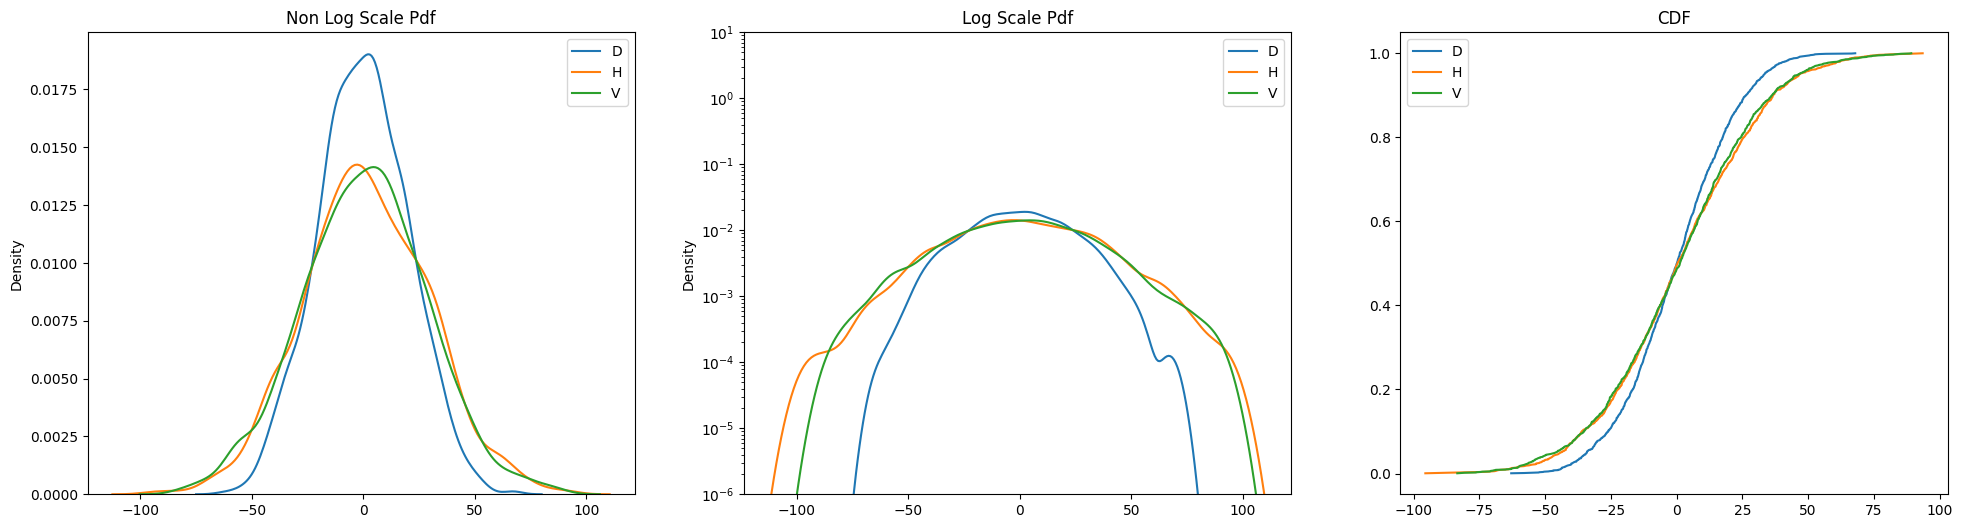

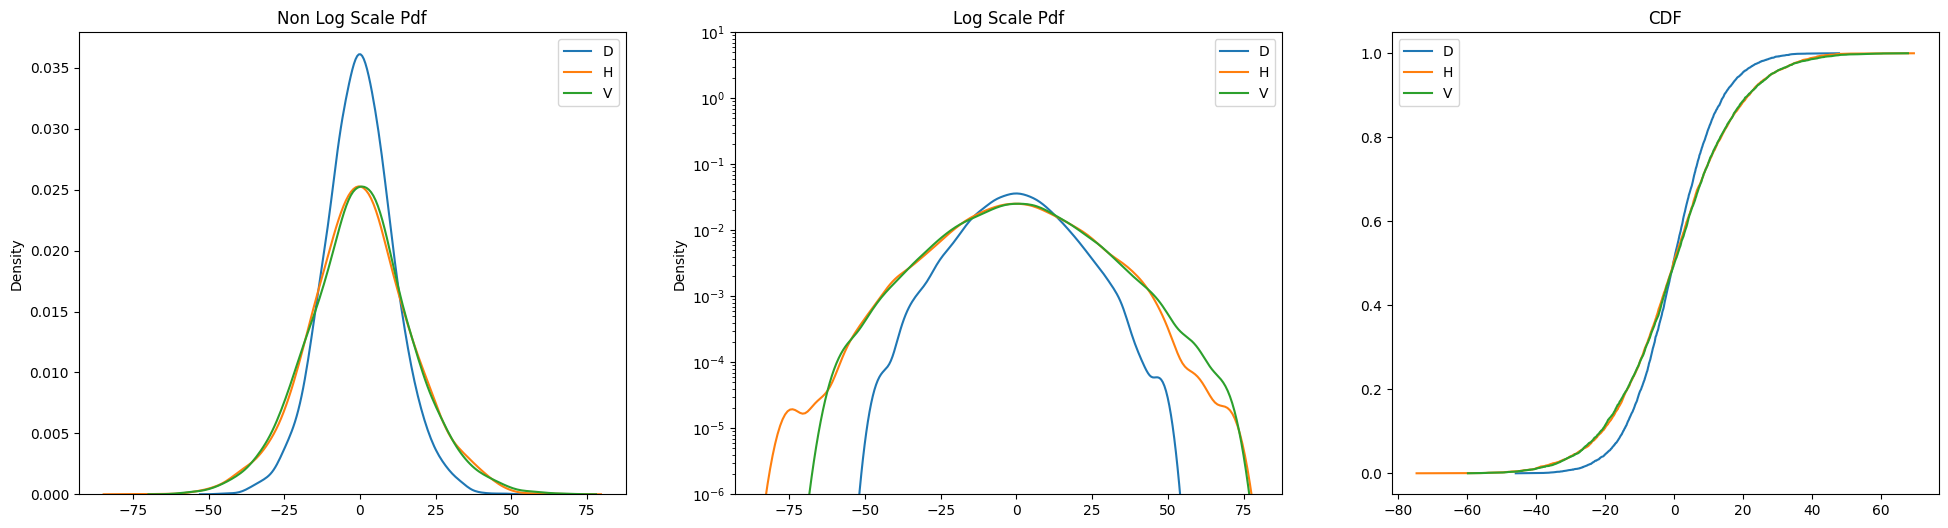

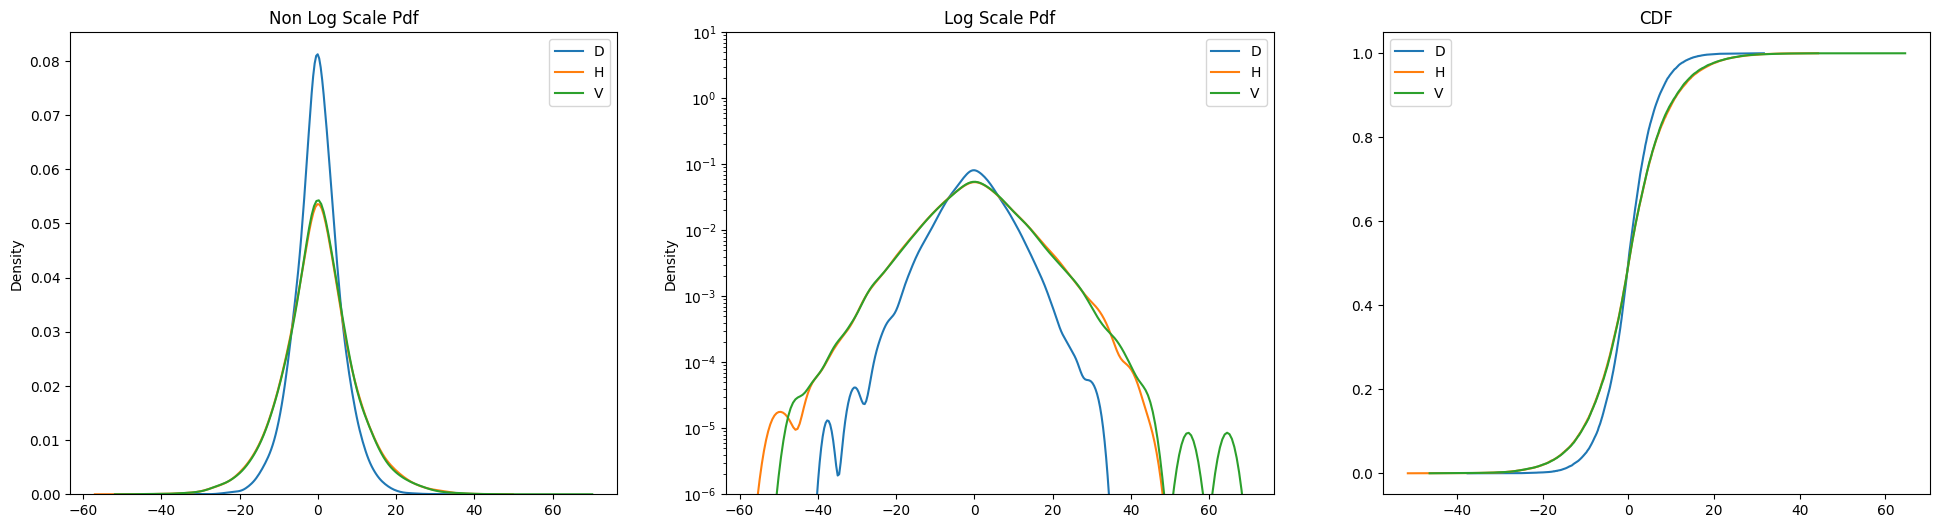

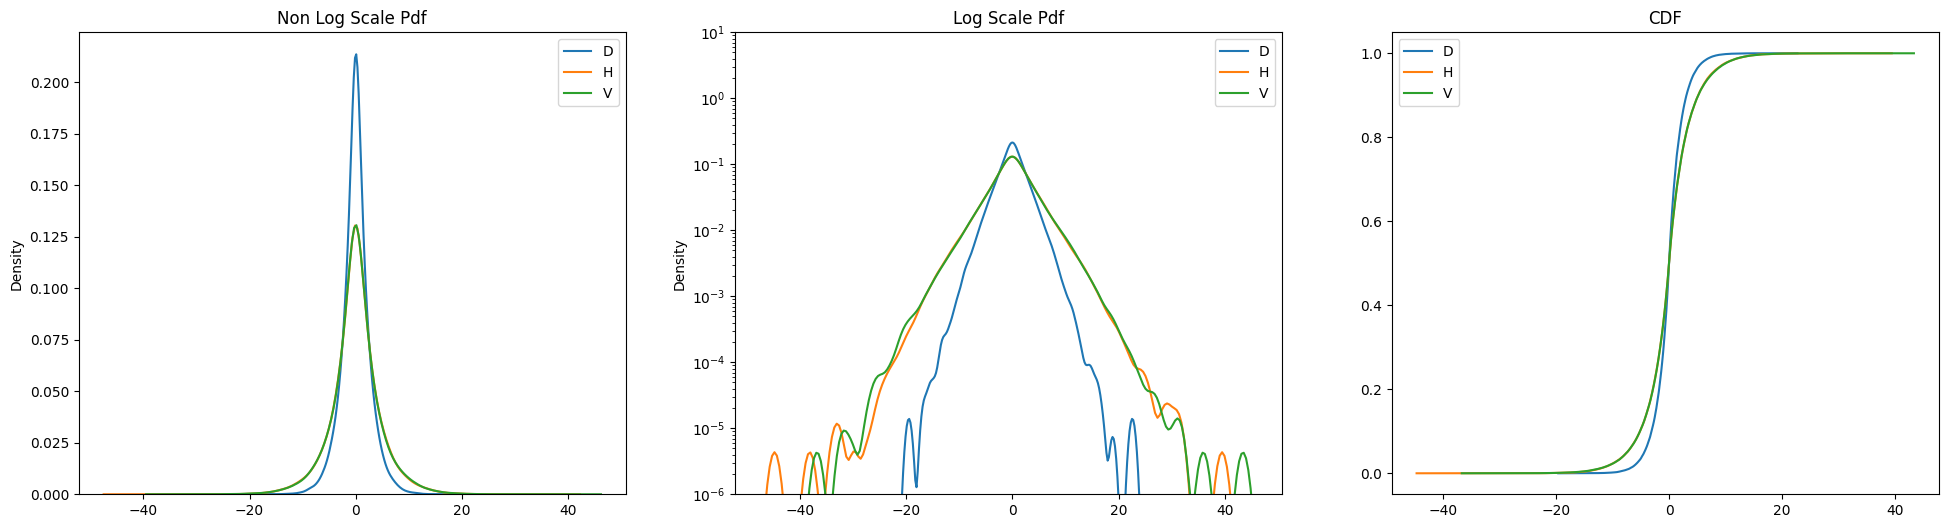

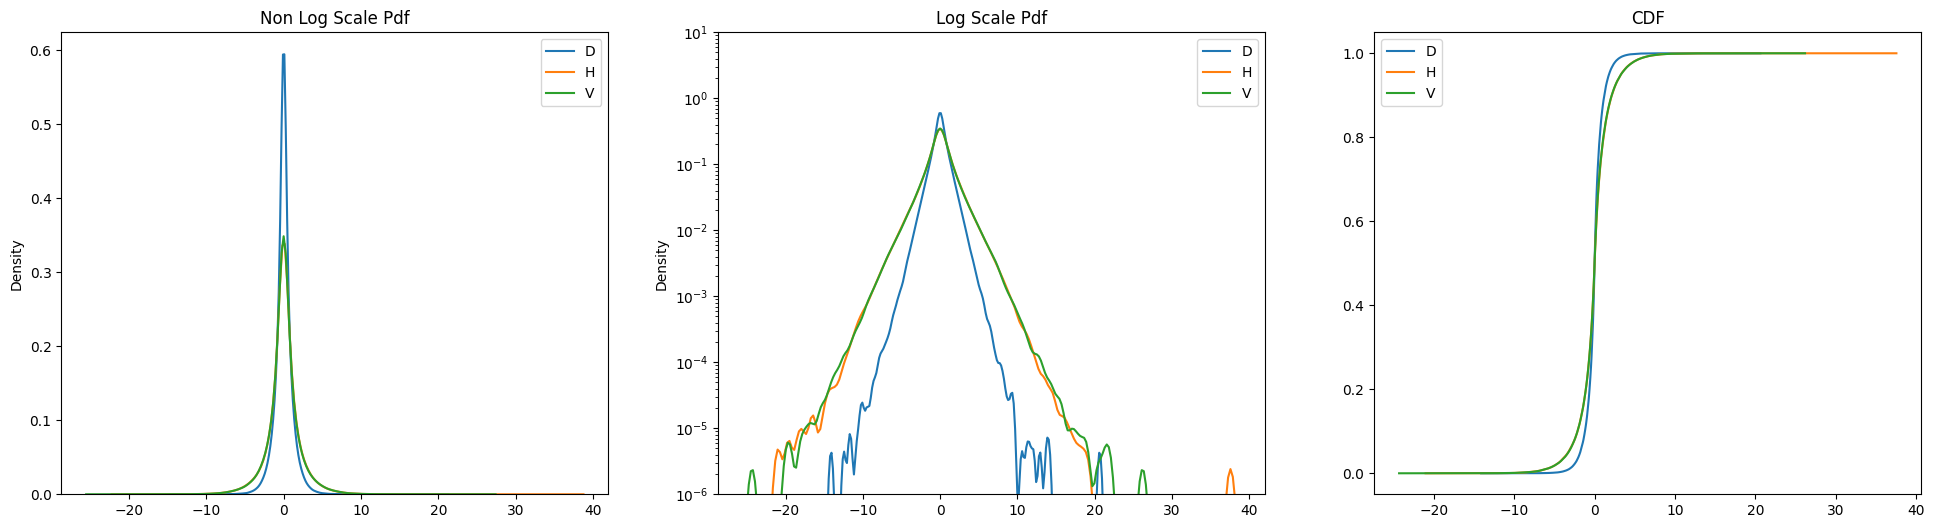

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


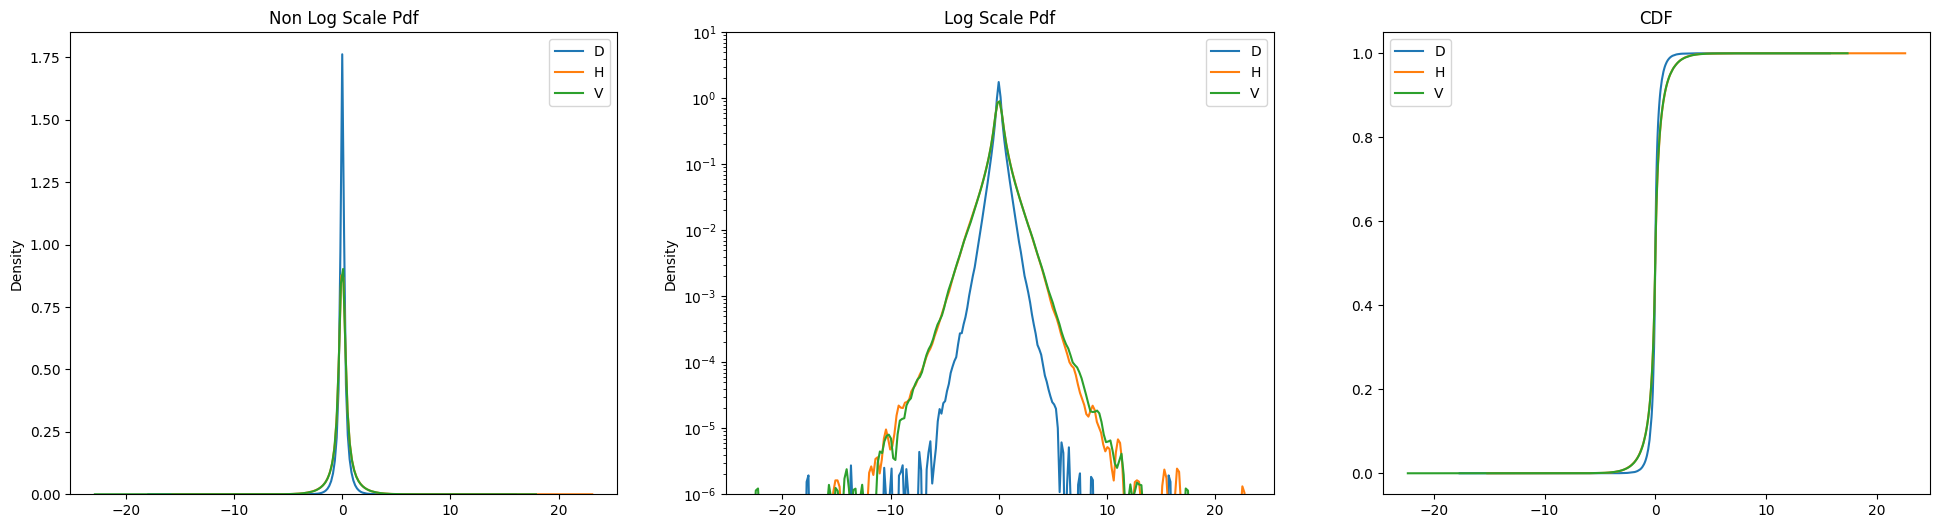

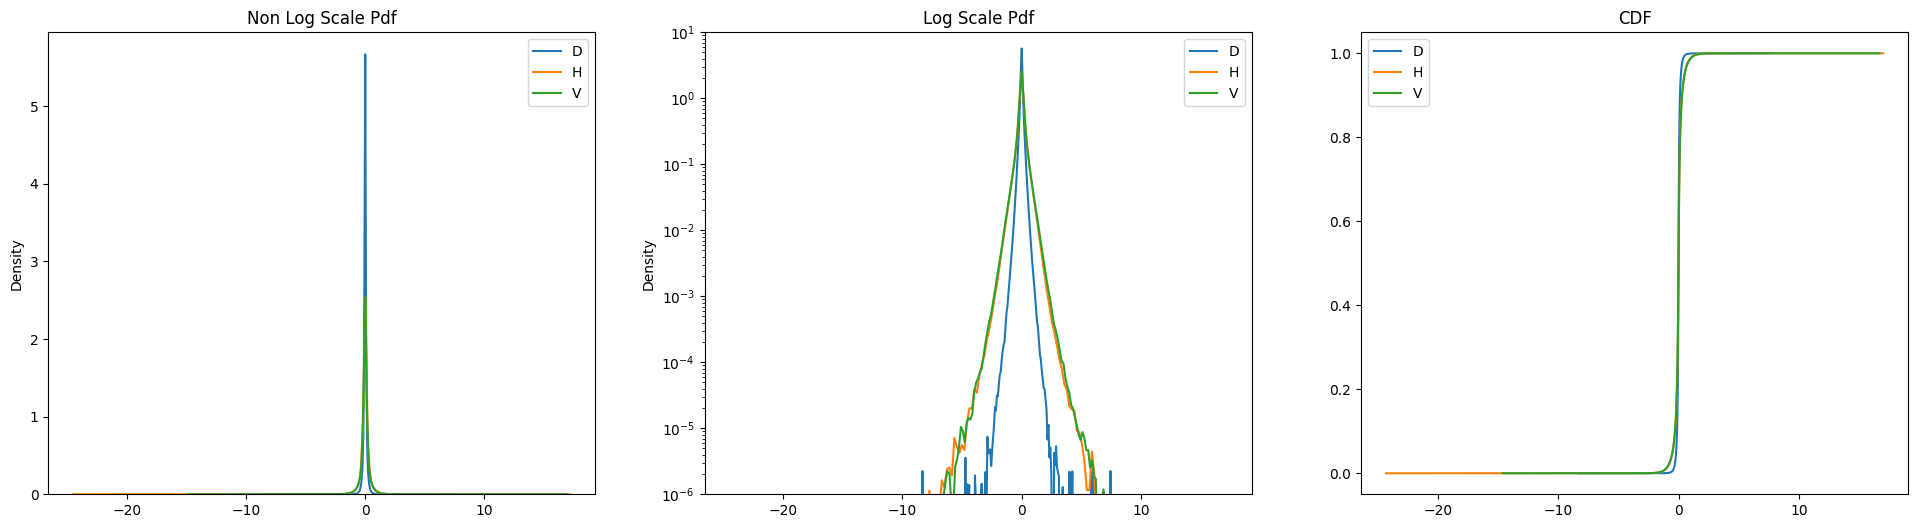

In [20]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


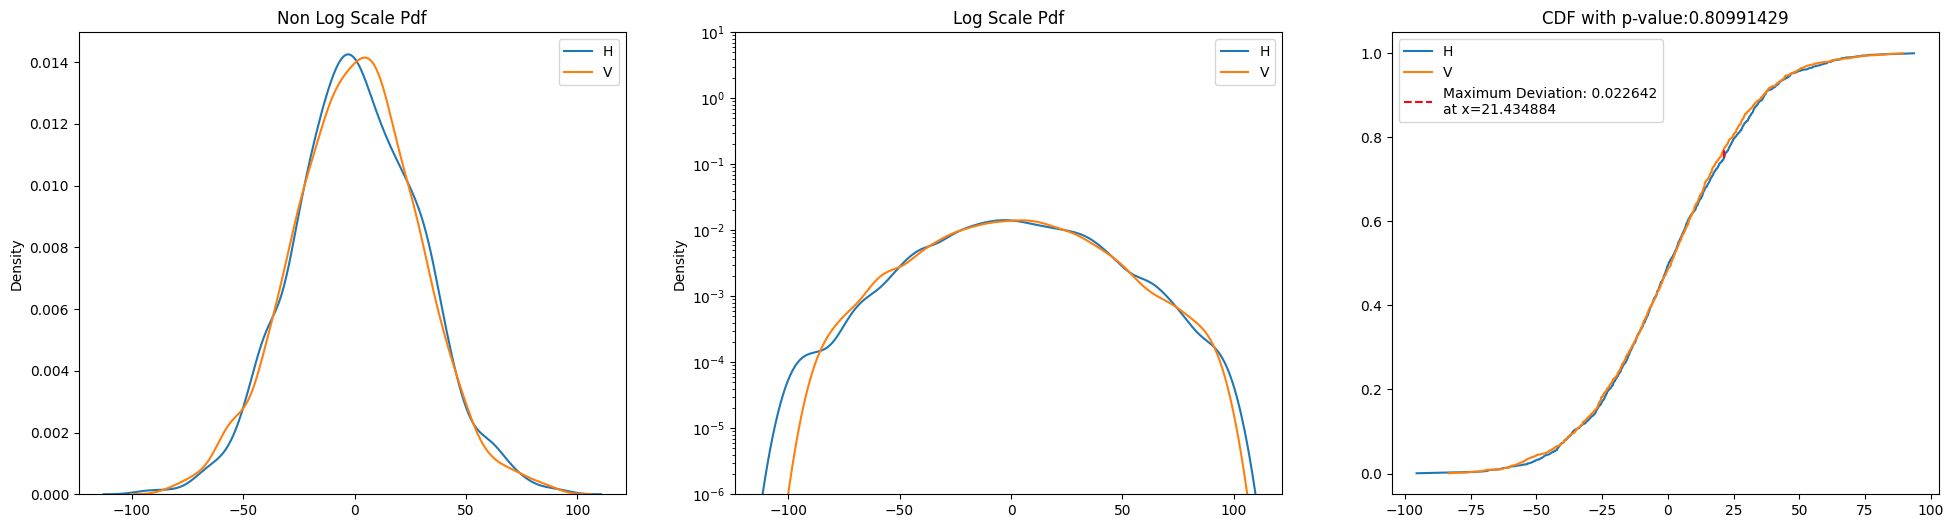

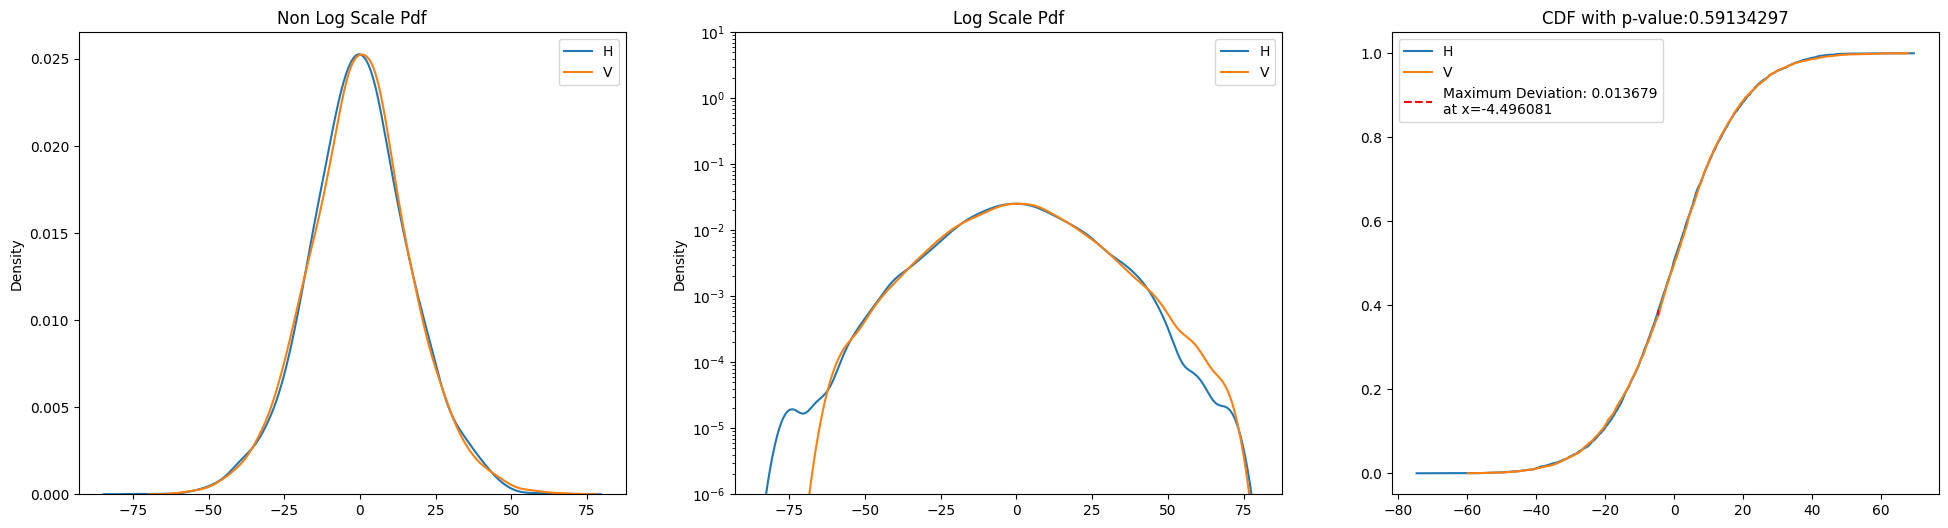

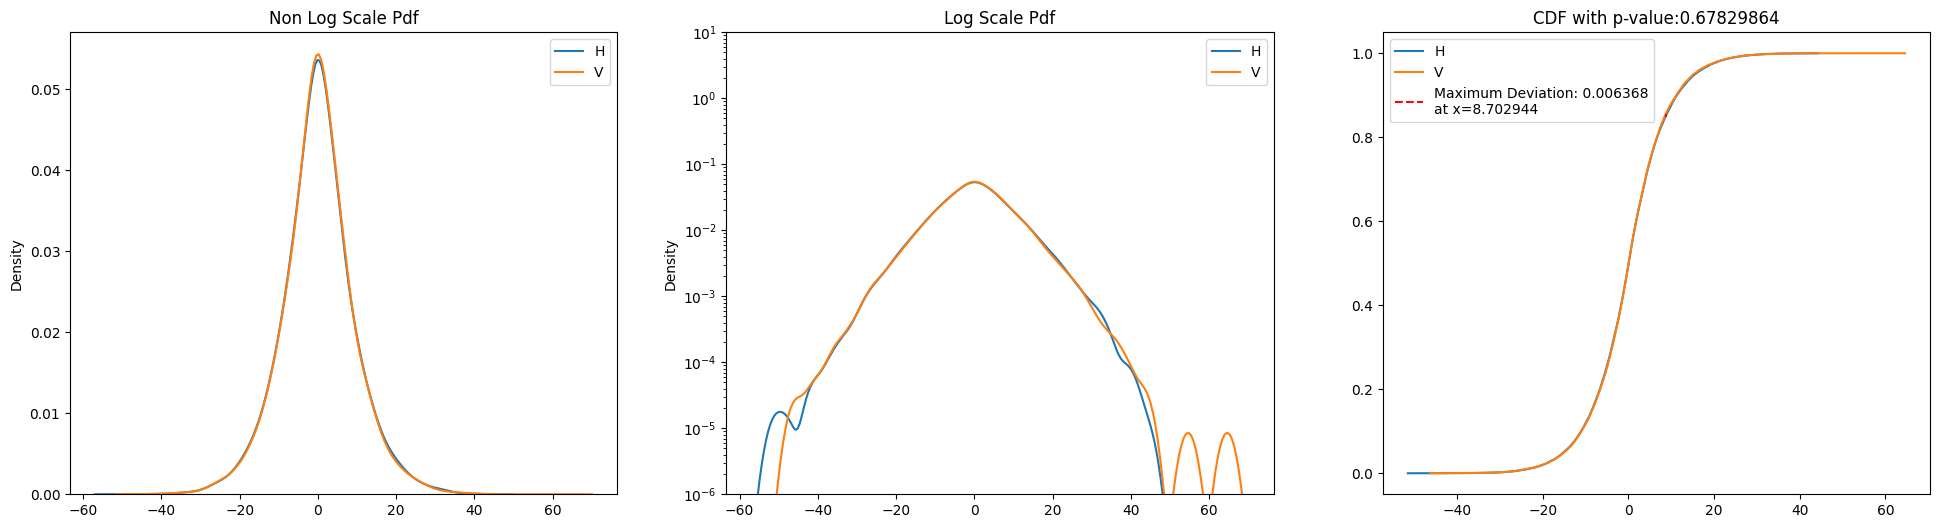

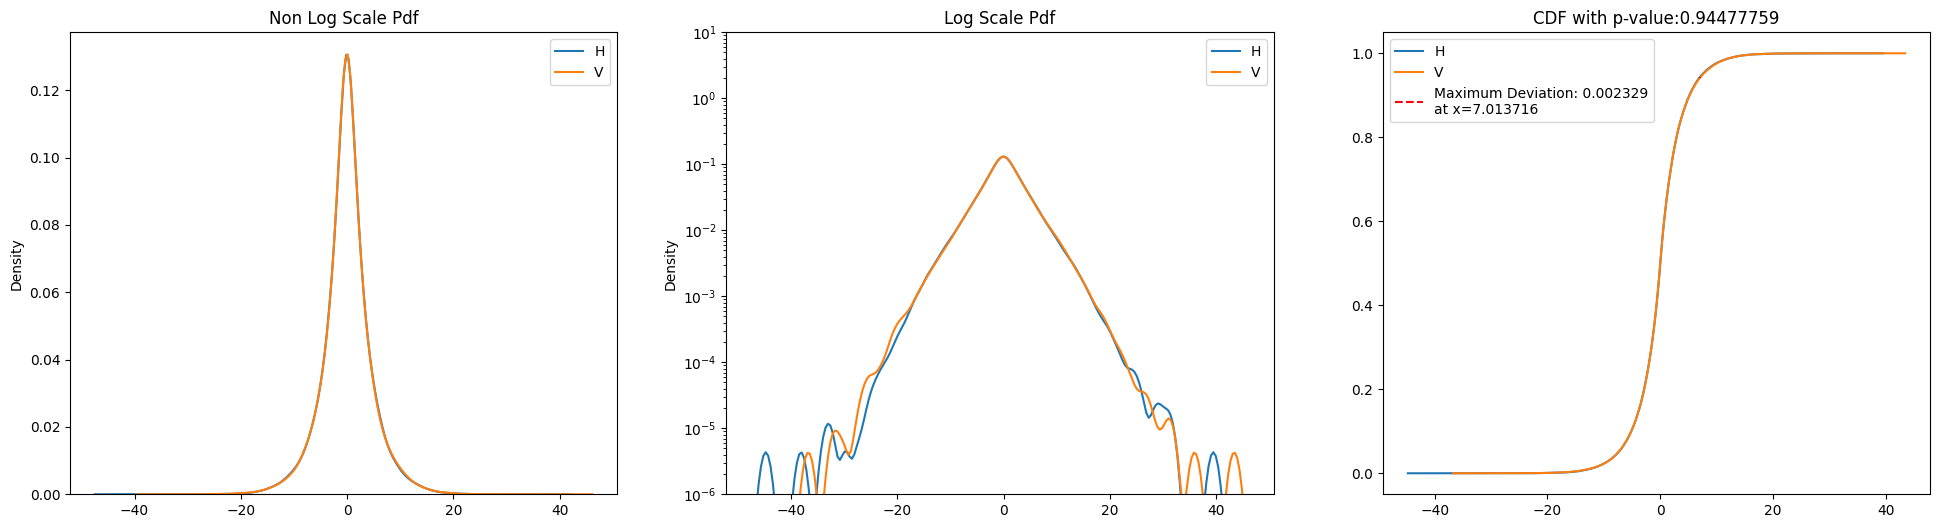

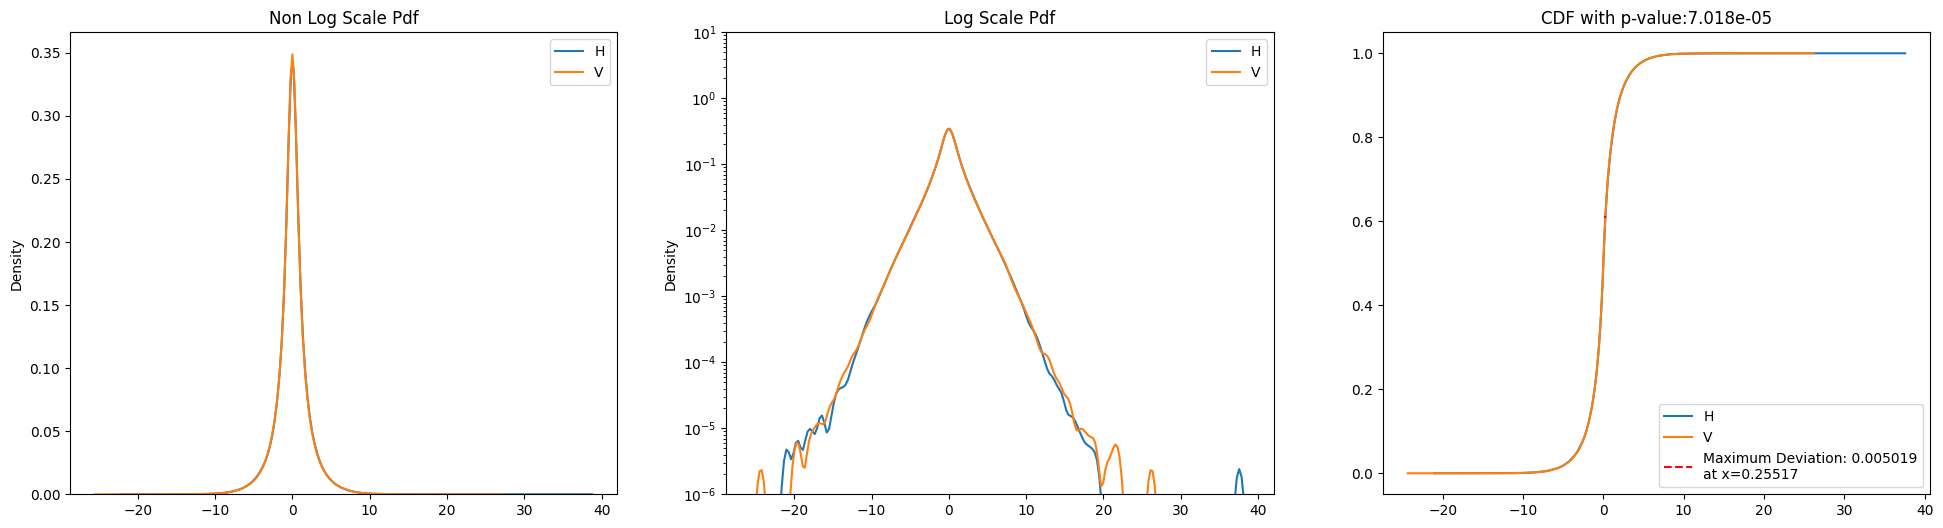

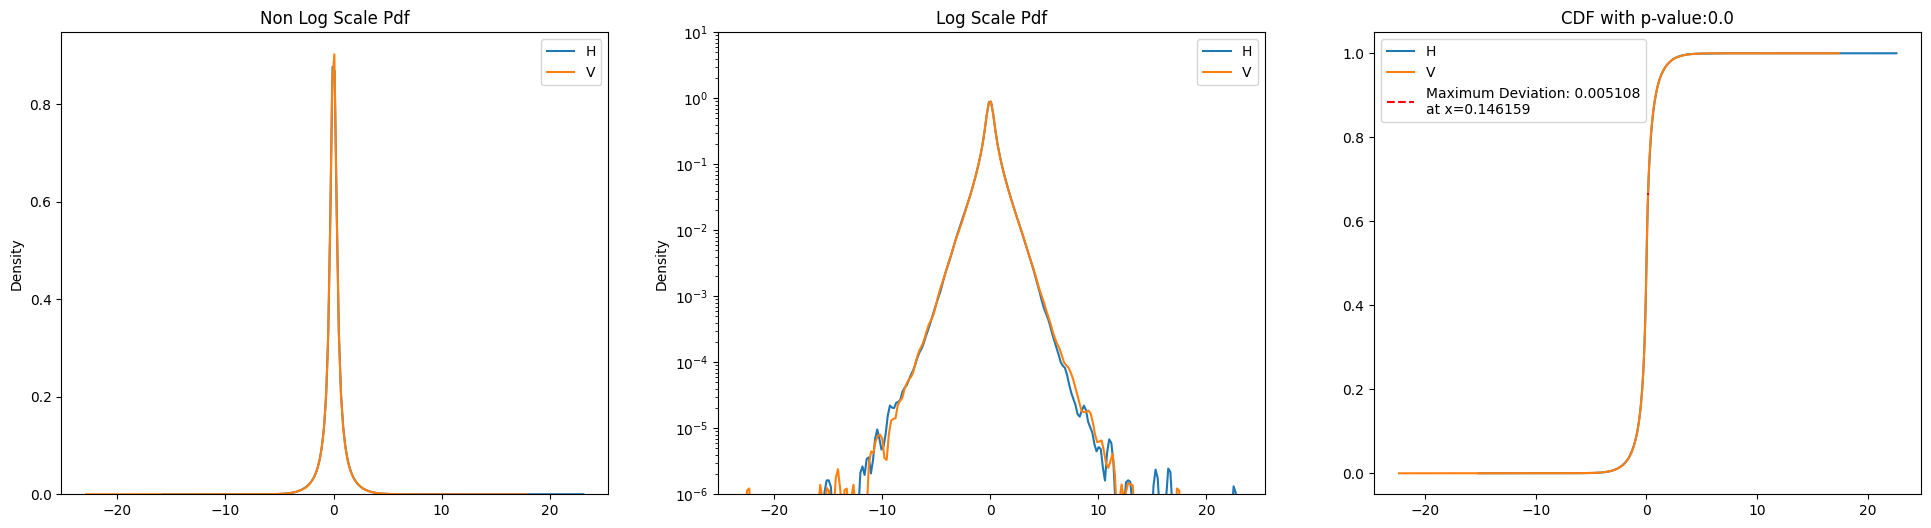

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


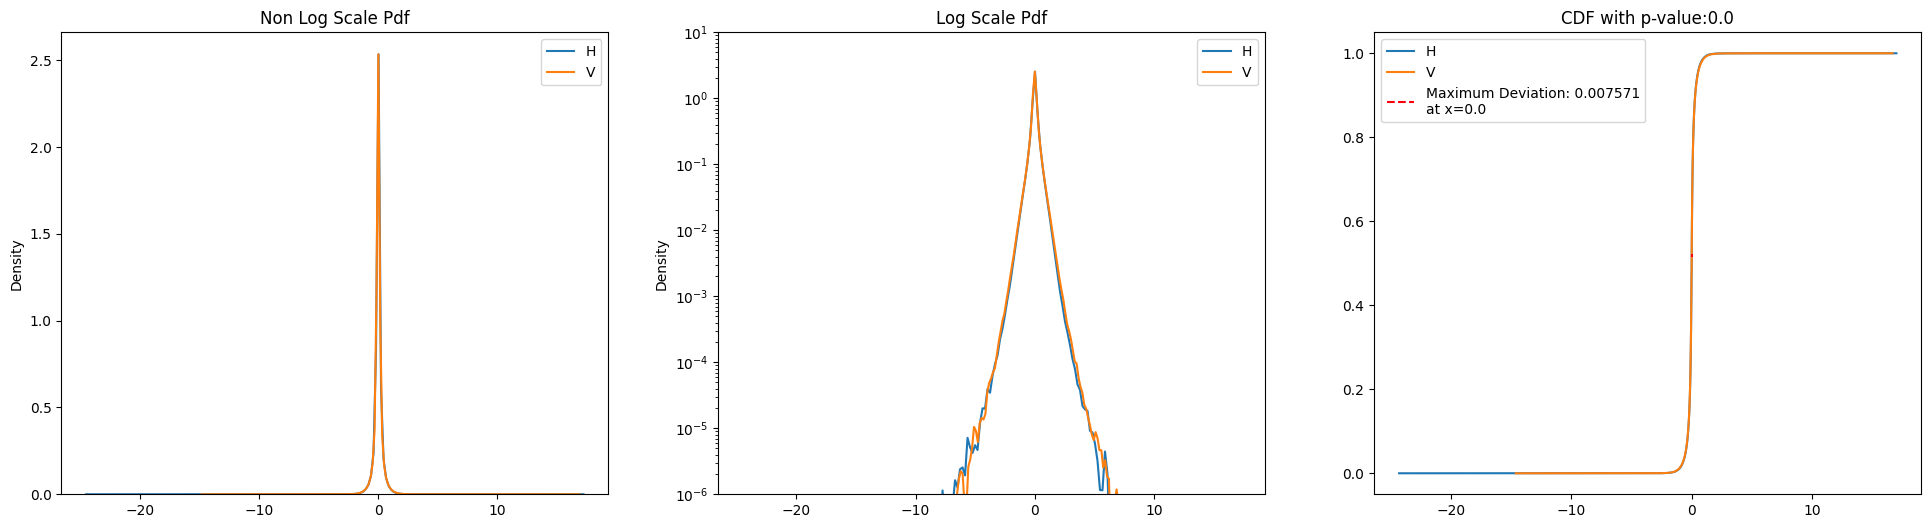

In [21]:
for i in range(2, LAYER_MAX):
    layer_df = red_wv[red_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Green

In [ ]:
green_wv = convert_to_wavelet_basis(data_dir, "green", debug=True)
green_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:05<00:00, 309.65it/s]


channel  layer orientation  \
0   green      1          L1   
1   green      2           D   
2   green      2           H   
3   green      2           V   
4   green      3           D   

                                                data  
0  [-1.4210854715202004e-14, -2.6645352591003757e...  
1  [35.727119197690406, 1.1329782816644824, 7.472...  
2  [65.57655755681799, -7.983492904896258, -34.28...  
3  [32.705158019956855, -9.922828438727052, 24.43...  
4  [11.696582625264755, -3.830958357162441, -6.62...

In [23]:
green_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    green_df = pd.concat([green_df, ks_df], axis = 0)
green_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_6124/3122142642.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  green_df = pd.concat([green_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.023899   7.543629e-01
1     2     D      V  0.093082   2.048166e-06
0     2     D      H  0.106918   2.481059e-08
2     3     H      V  0.011321   8.097884e-01
1     3     D      V  0.088836   2.989607e-22
0     3     D      H  0.091195   1.993992e-23
2     4     H      V  0.008569   3.059694e-01
1     4     D      V  0.084277   4.800130e-79
0     4     D      H  0.089741   1.378344e-89
2     5     H      V  0.004501   2.532802e-01
1     5     D      V  0.088237   0.000000e+00
0     5     D      H  0.090320   0.000000e+00
2     6     H      V  0.005813   2.120929e-06
1     6     D      V  0.083756   0.000000e+00
0     6     D      H  0.088763   0.000000e+00
2     7     H      V  0.006645   1.193312e-31
1     7     D      V  0.082529   0.000000e+00
0     7     D      H  0.088554   0.000000e+00
2     8     H      V  0.006282  4.696032e-112
1     8     D      V  0.108163   0.000000e+00
0     8     D      H  0.108462   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


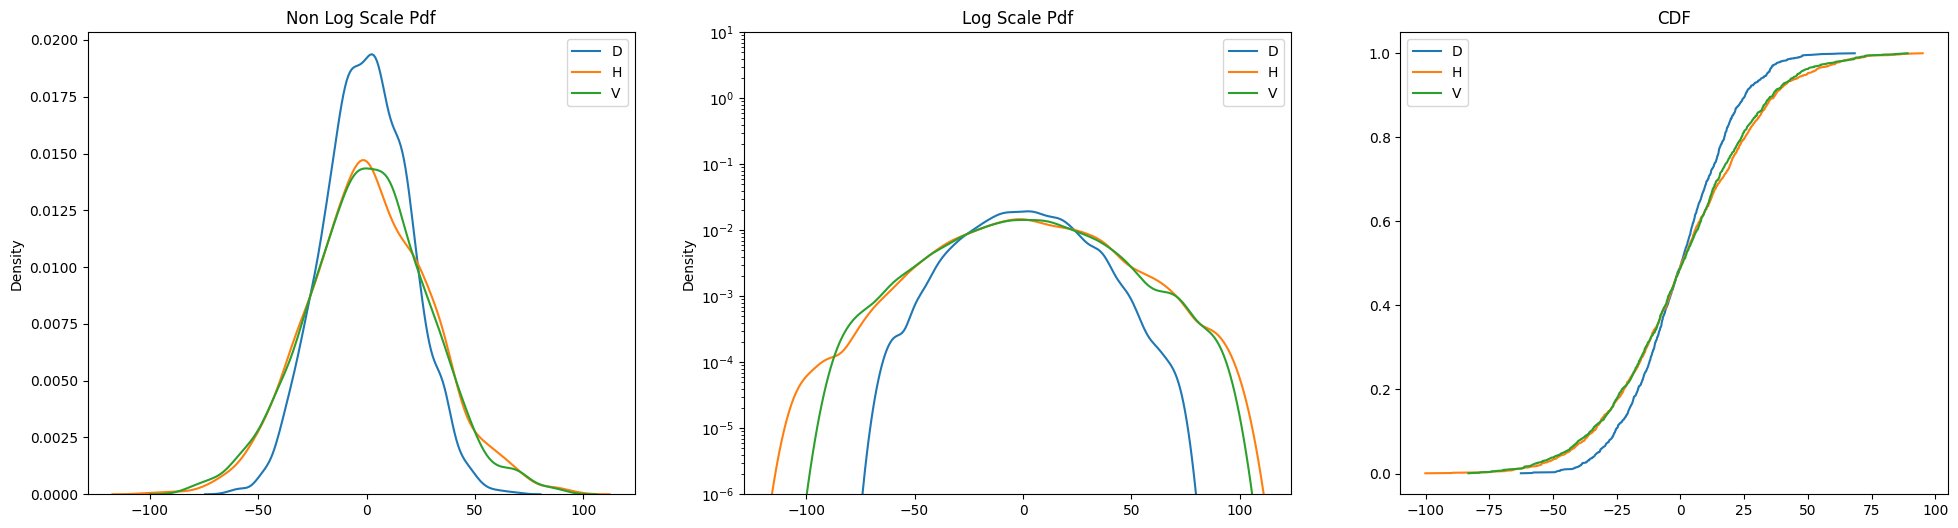

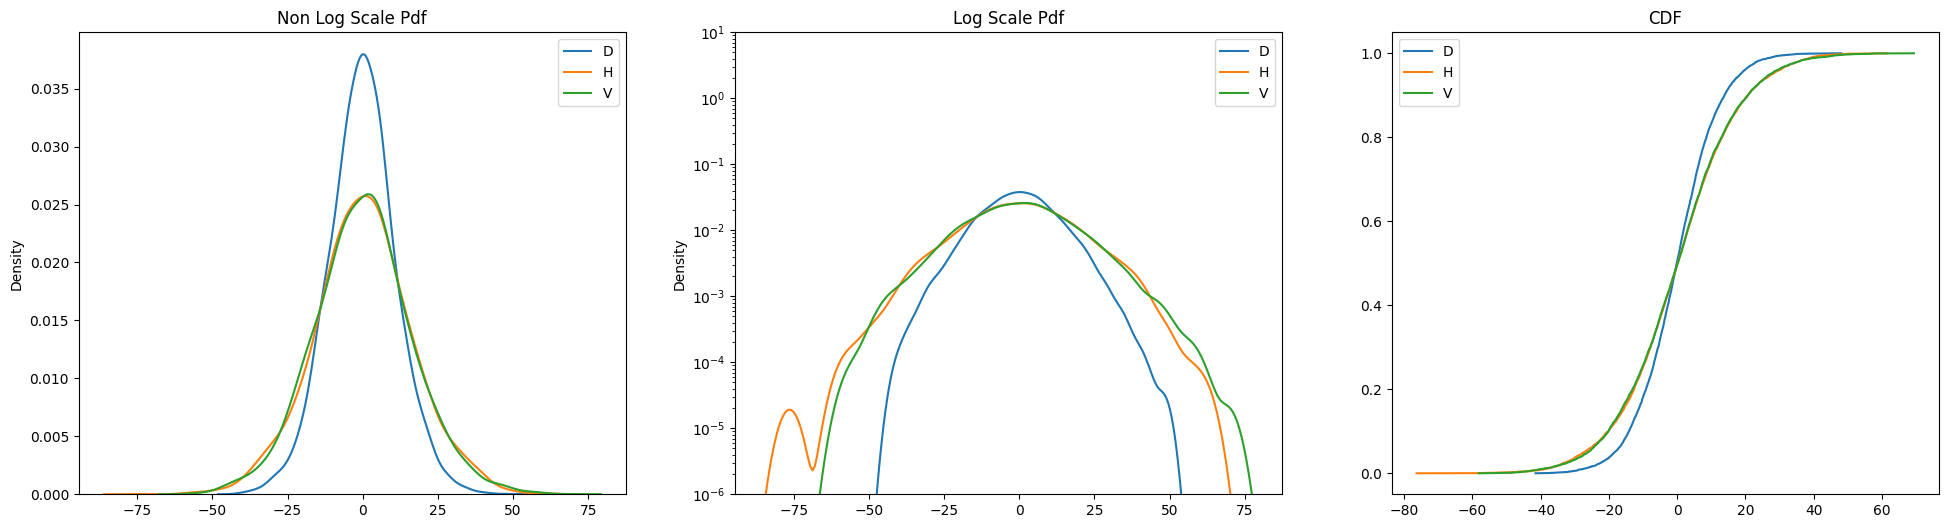

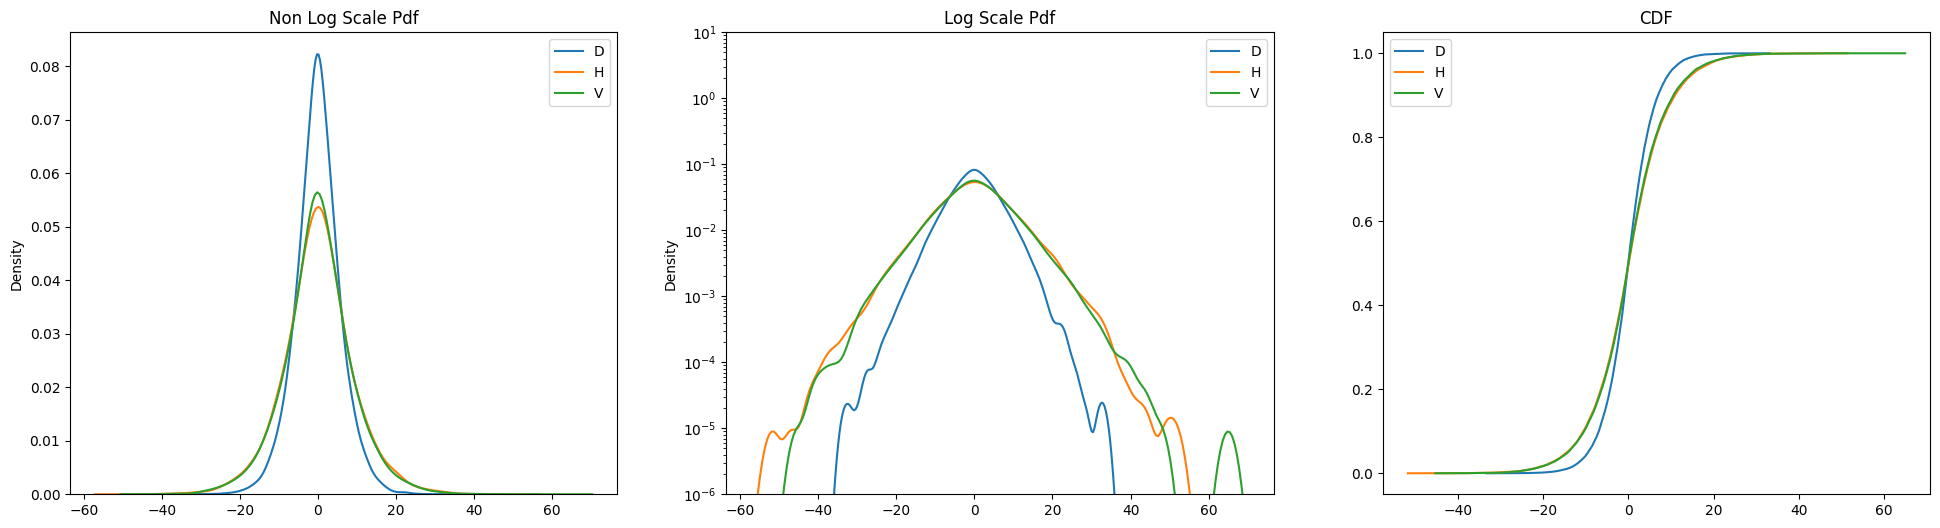

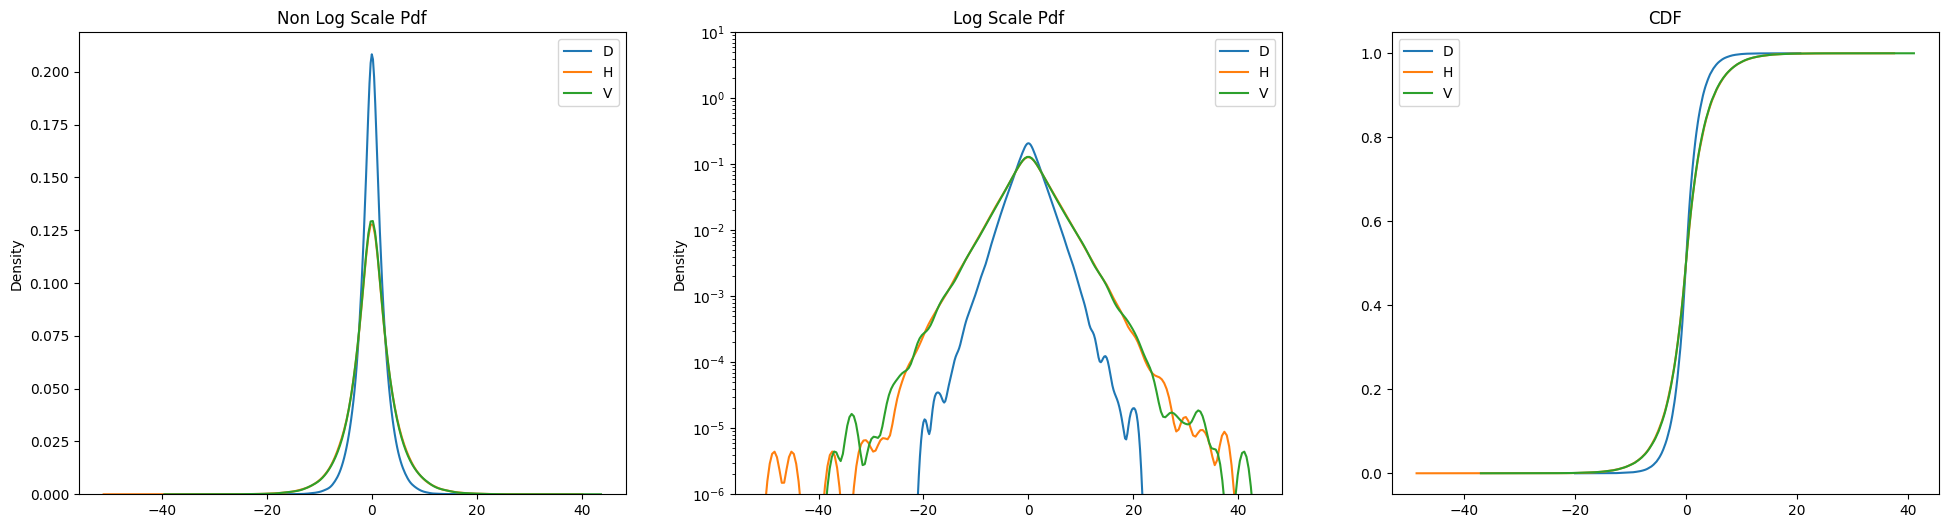

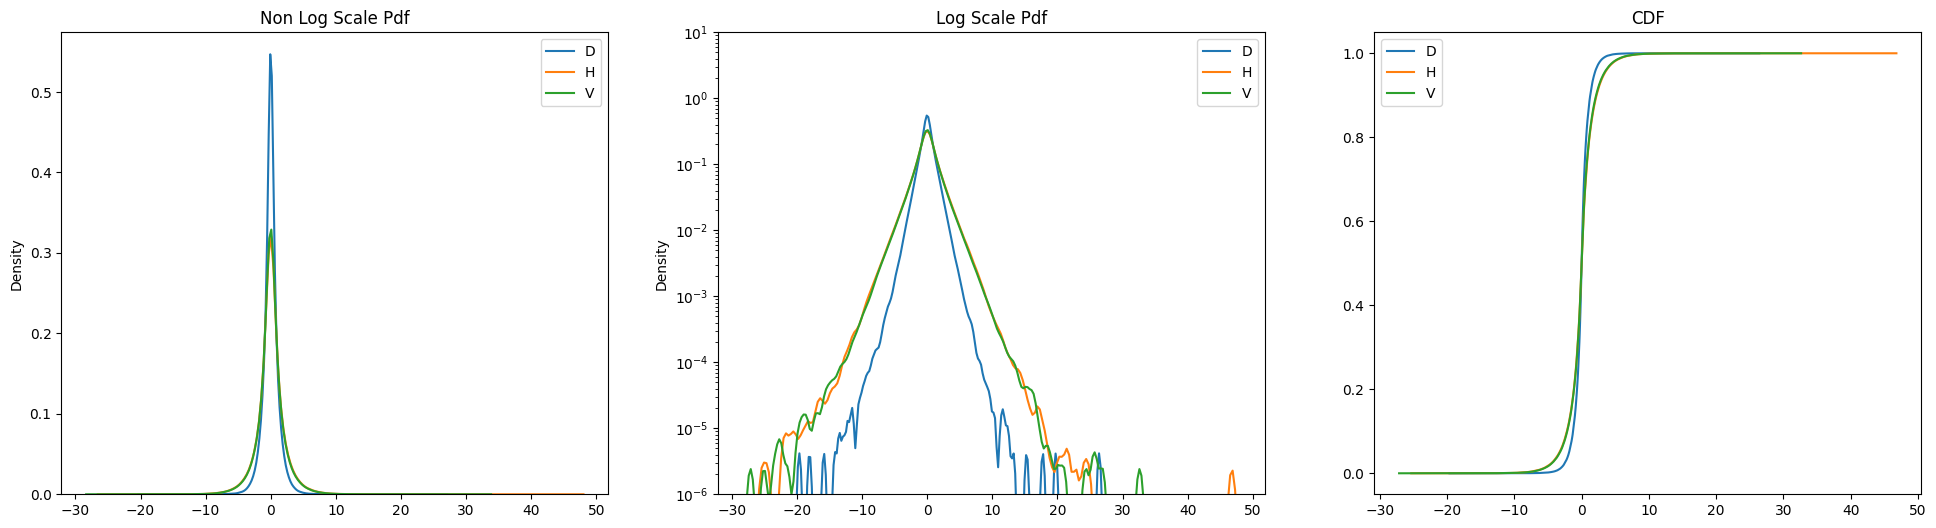

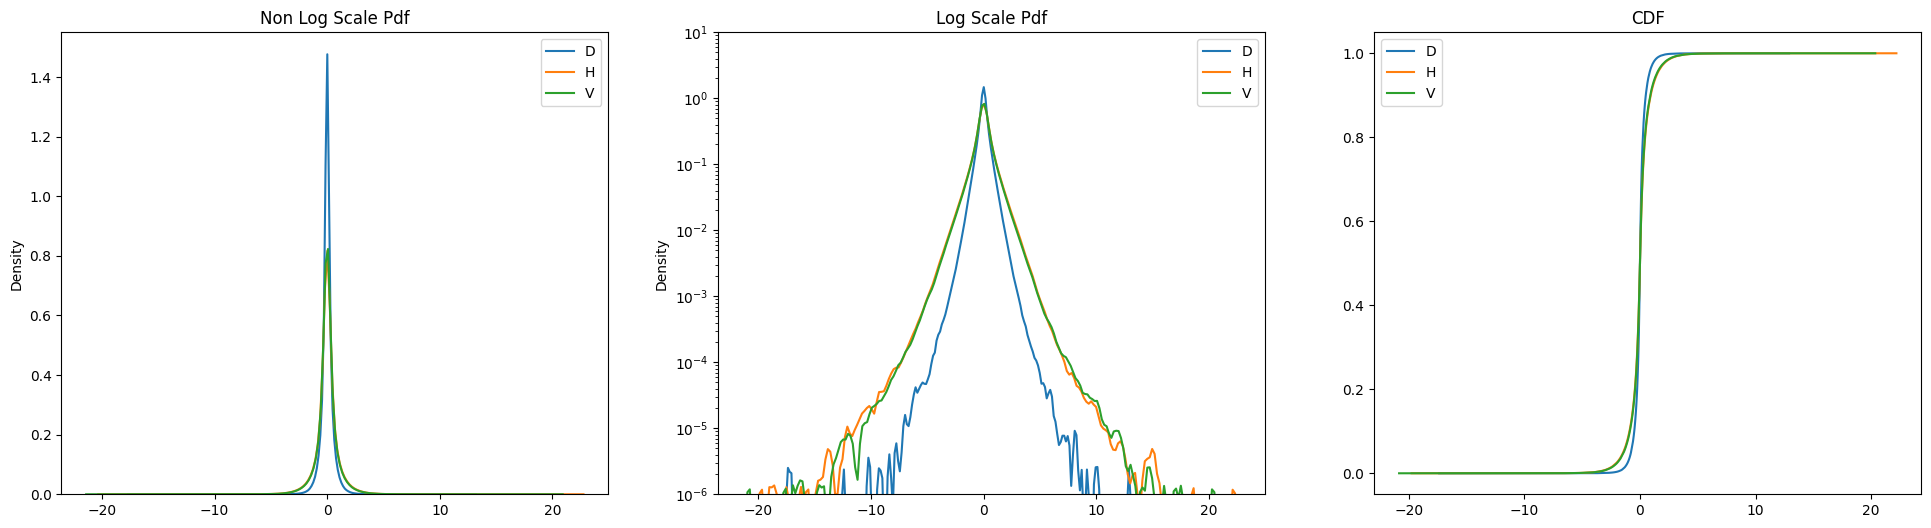

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


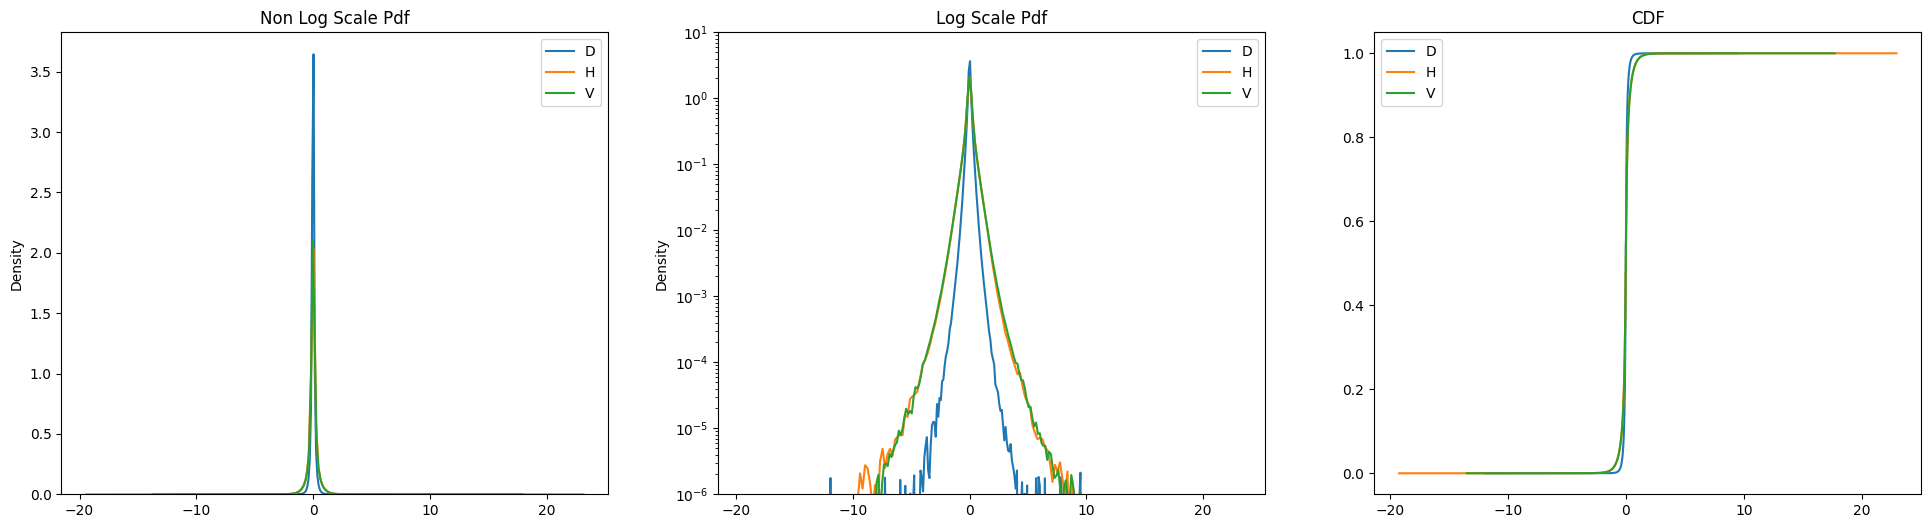

In [24]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


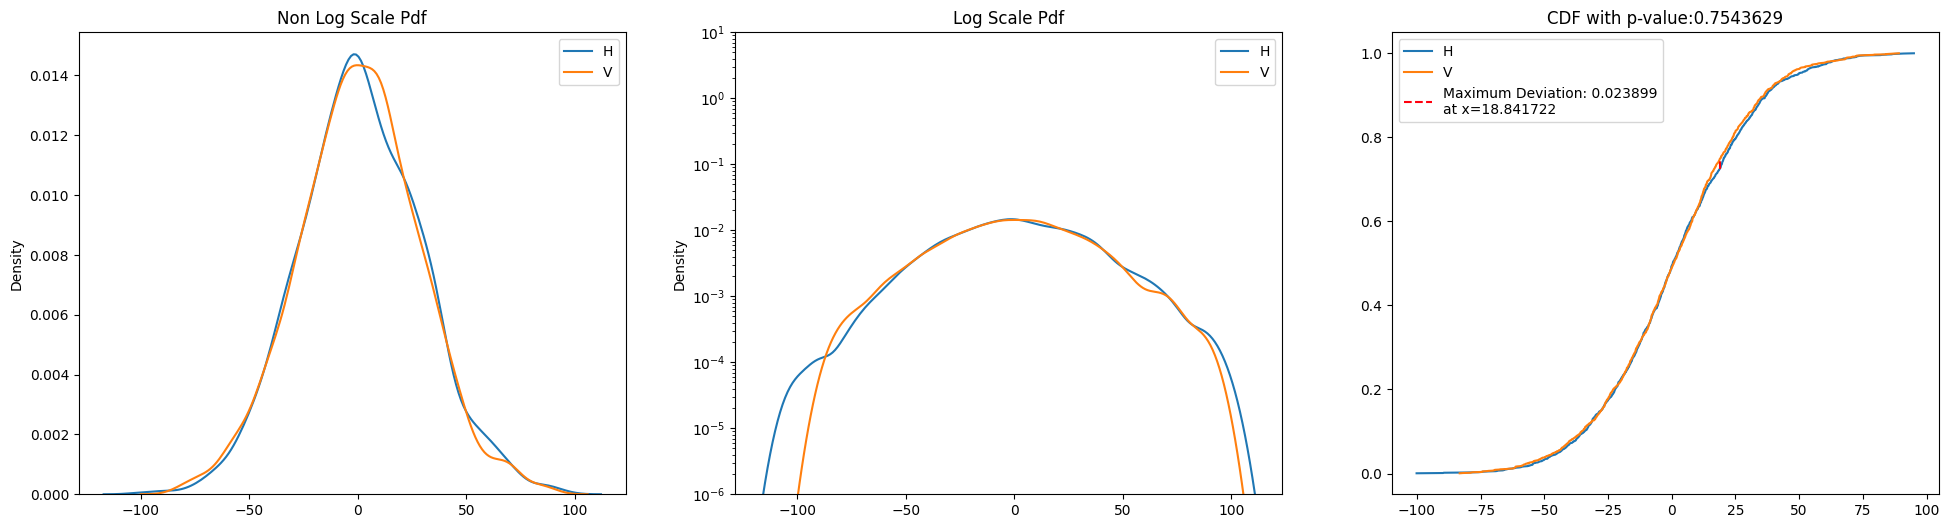

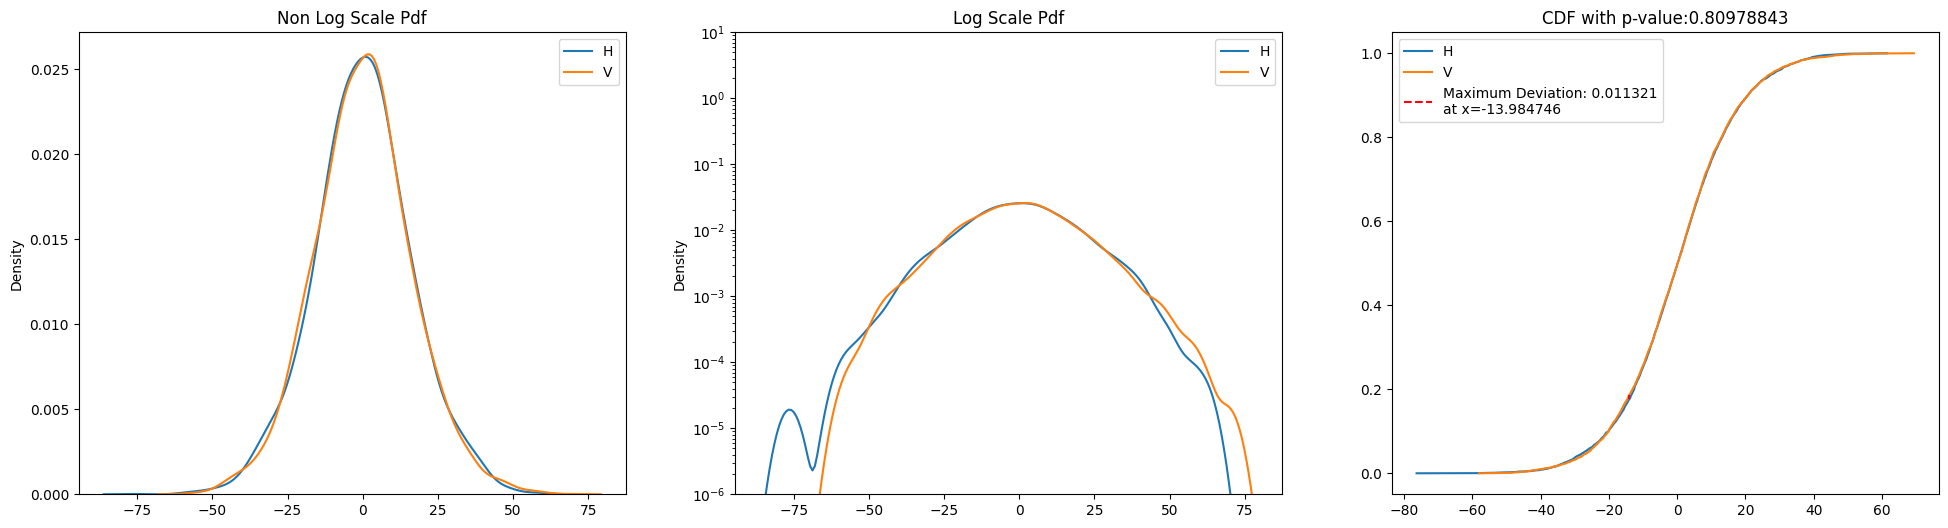

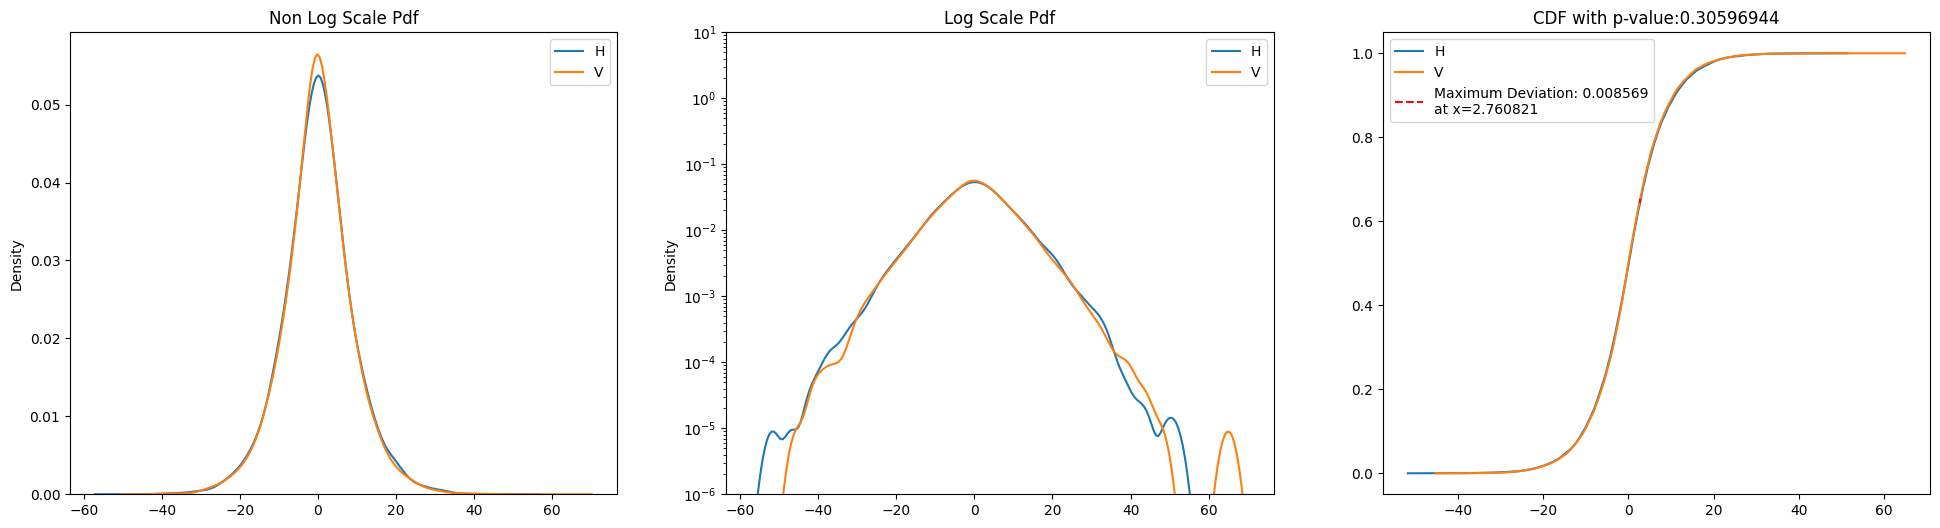

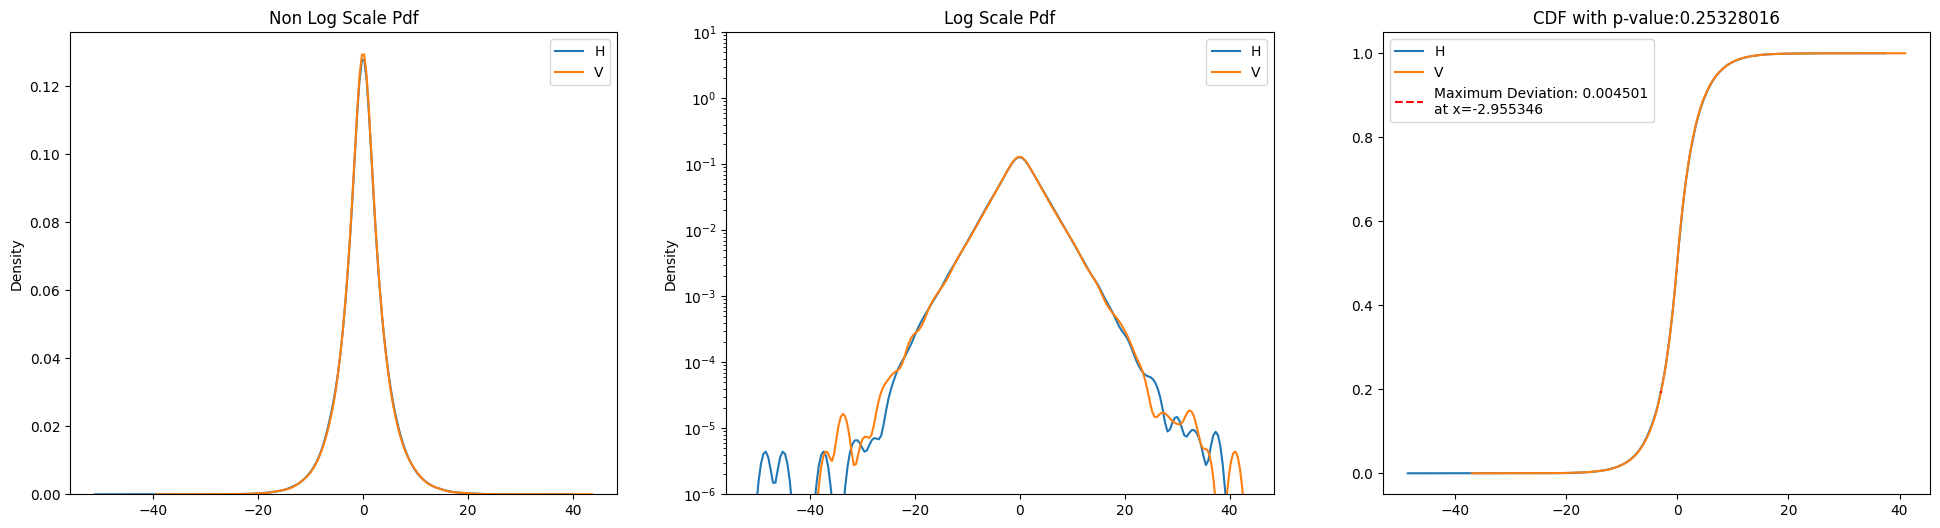

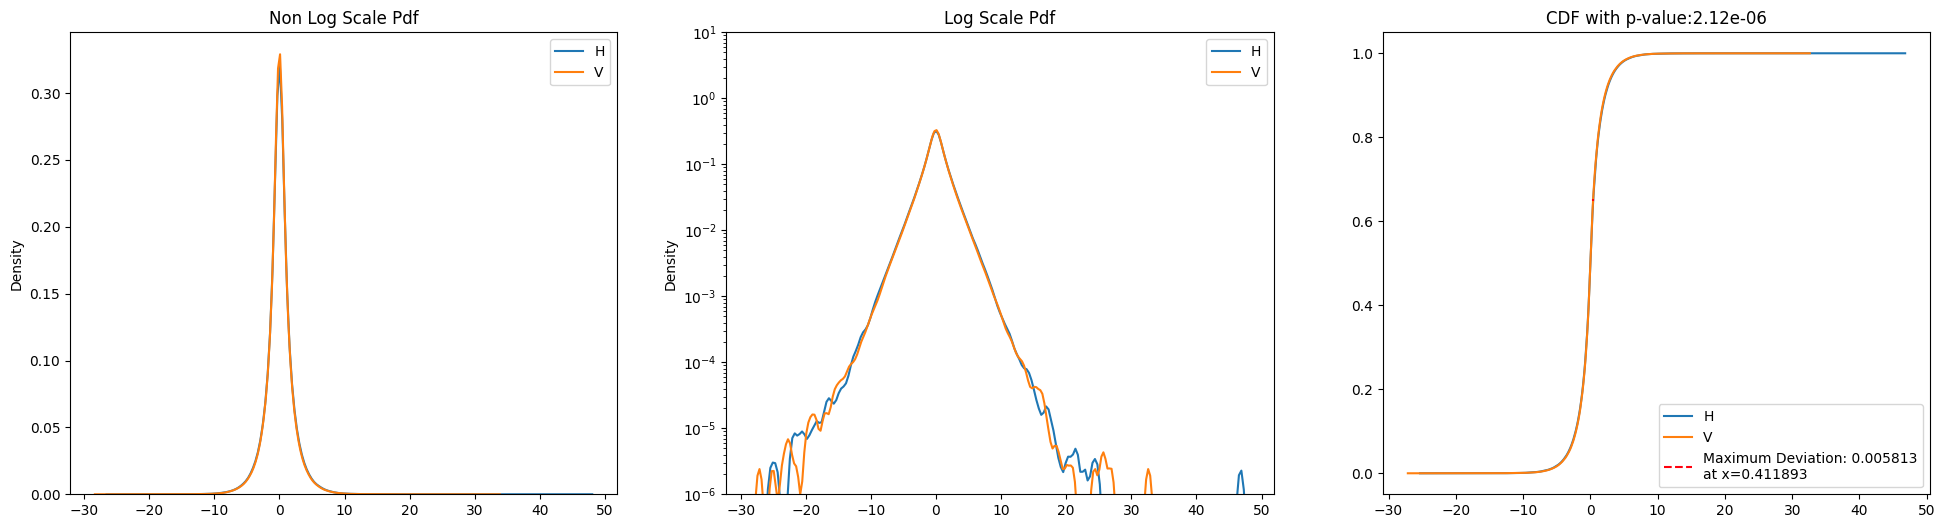

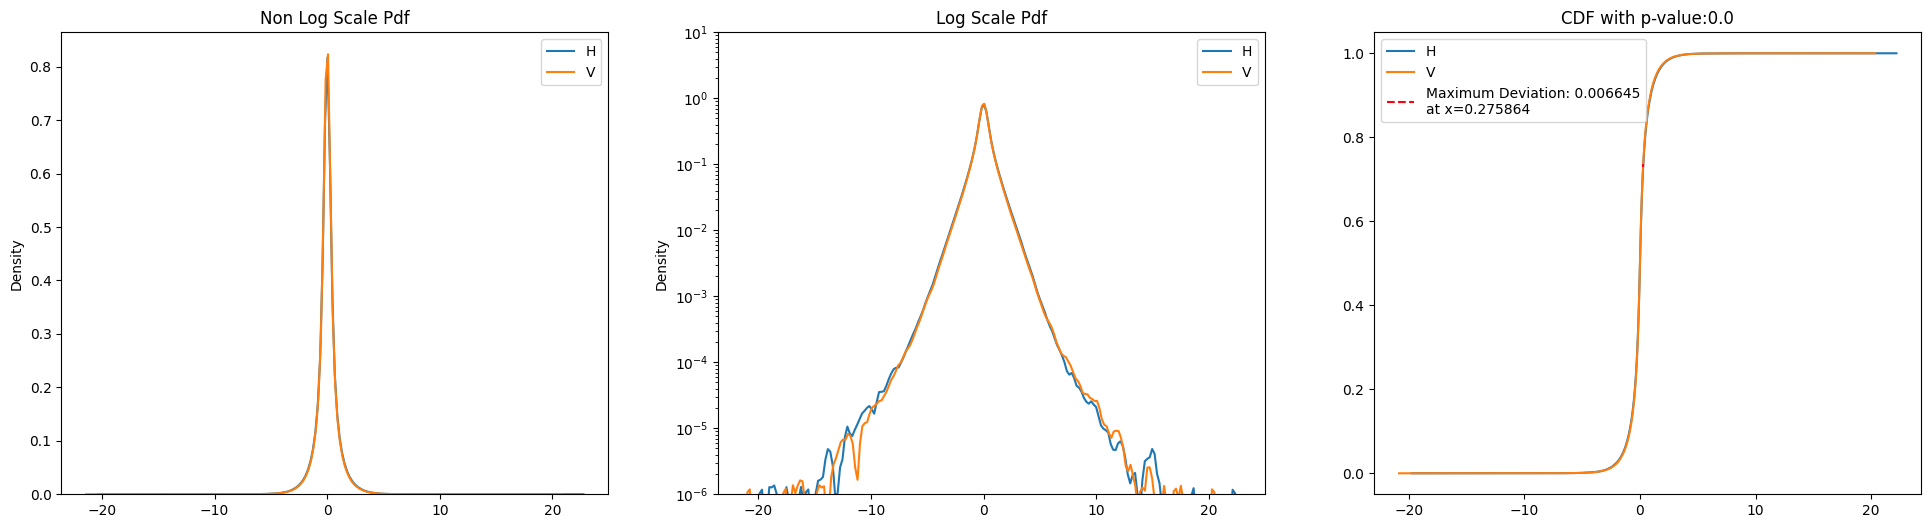

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


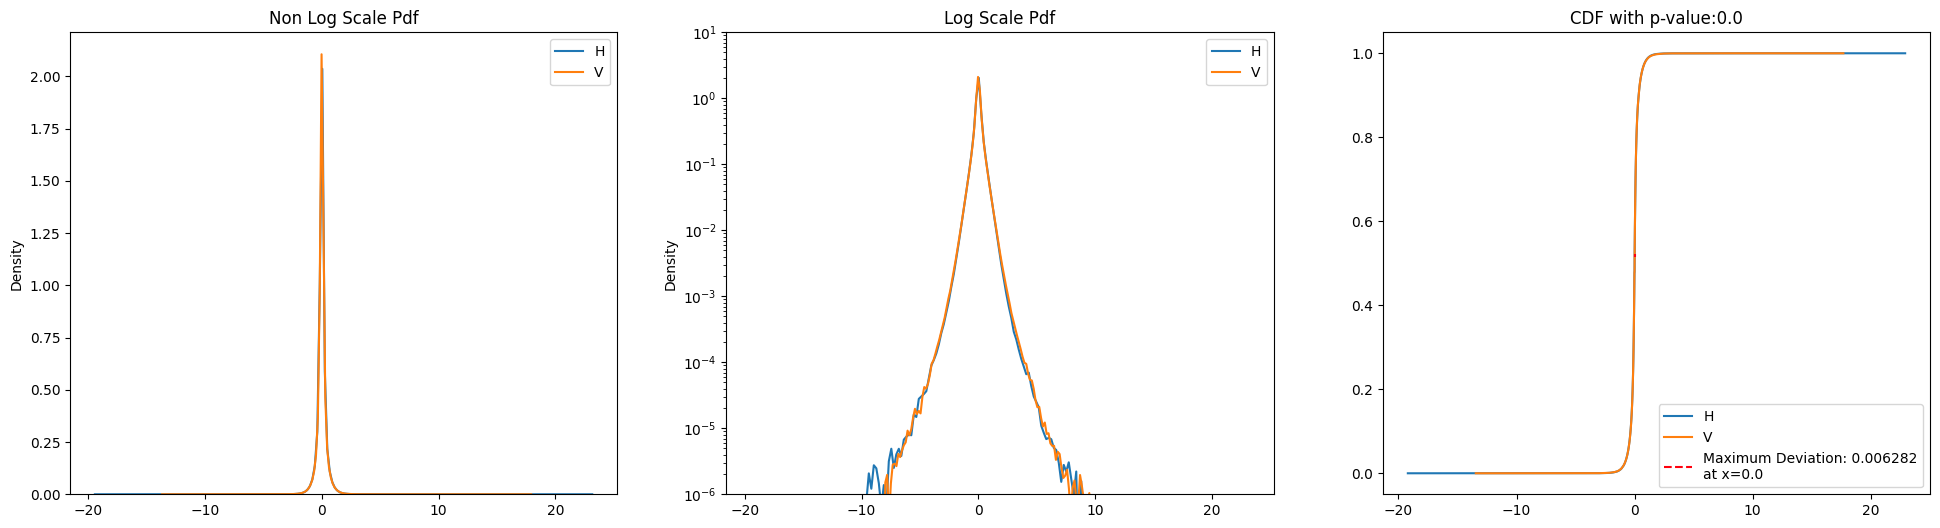

In [25]:
for i in range(2, LAYER_MAX):
    layer_df = green_wv[green_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Blue

In [ ]:
blue_wv = convert_to_wavelet_basis(data_dir, "blue", debug=True)
blue_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:07<00:00, 227.08it/s]


channel  layer orientation  \
0    blue      1          L1   
1    blue      2           D   
2    blue      2           H   
3    blue      2           V   
4    blue      3           D   

                                                data  
0  [0.0, -1.6653345369377348e-15, 0.0, 0.0, 0.0, ...  
1  [30.609450596567413, -3.2234777167412028, 11.2...  
2  [70.750317148223, -8.433737676431646, -34.0451...  
3  [30.357868981862378, -1.2541480806299945, 27.5...  
4  [3.7771239721258016, -3.2692860843343614, -7.6...

In [27]:
blue_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    blue_df = pd.concat([blue_df, ks_df], axis = 0)
blue_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_6124/3852482873.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blue_df = pd.concat([blue_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.023270   7.826316e-01
1     2     D      V  0.096226   7.928361e-07
0     2     D      H  0.109434   1.040969e-08
2     3     H      V  0.011792   7.684771e-01
1     3     D      V  0.088208   6.080704e-22
0     3     D      H  0.093396   1.493728e-24
2     4     H      V  0.007822   4.156260e-01
1     4     D      V  0.084906   3.174903e-80
0     4     D      H  0.088050   2.962876e-86
2     5     H      V  0.002614   8.767779e-01
1     5     D      V  0.087205   0.000000e+00
0     5     D      H  0.088964   0.000000e+00
2     6     H      V  0.004766   1.923233e-04
1     6     D      V  0.084739   0.000000e+00
0     6     D      H  0.087338   0.000000e+00
2     7     H      V  0.005454   1.843908e-21
1     7     D      V  0.082692   0.000000e+00
0     7     D      H  0.087696   0.000000e+00
2     8     H      V  0.006558  4.532509e-122
0     8     D      H  0.104119   0.000000e+00
1     8     D      V  0.104392   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


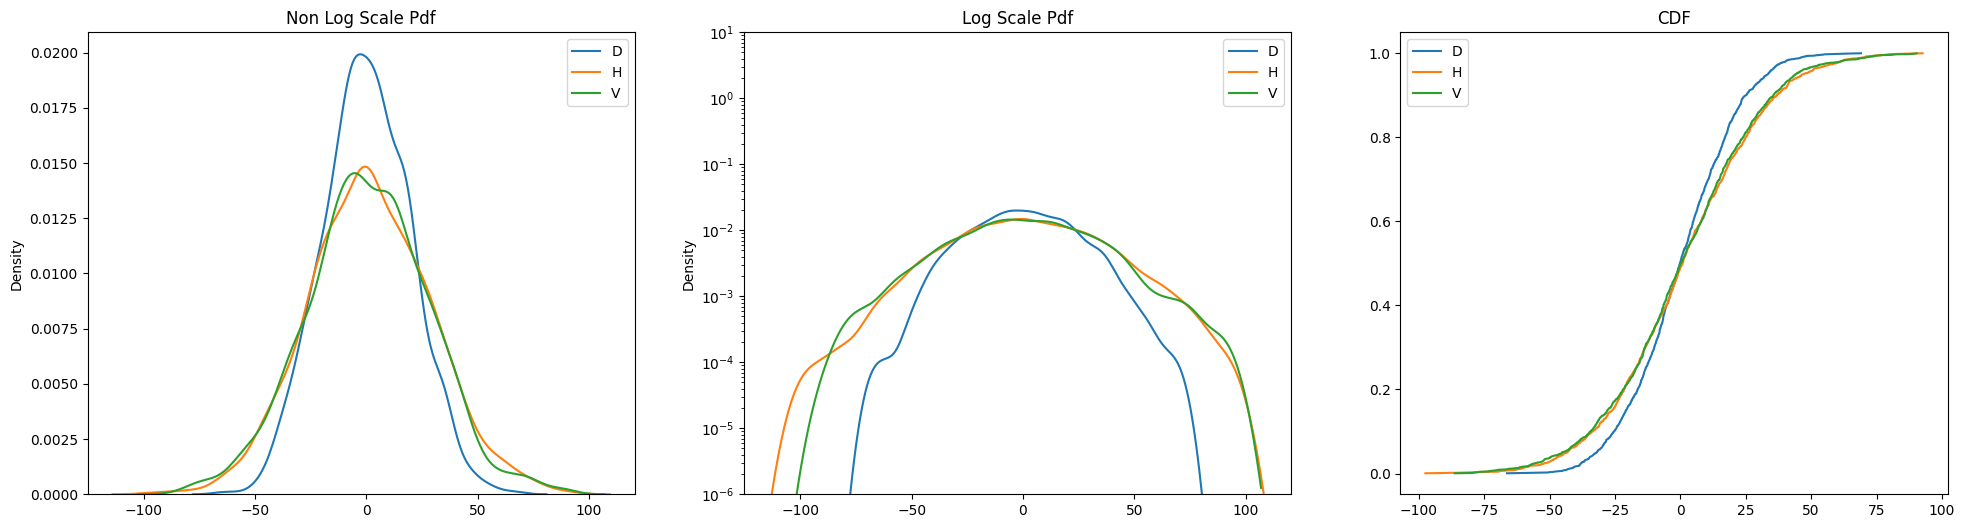

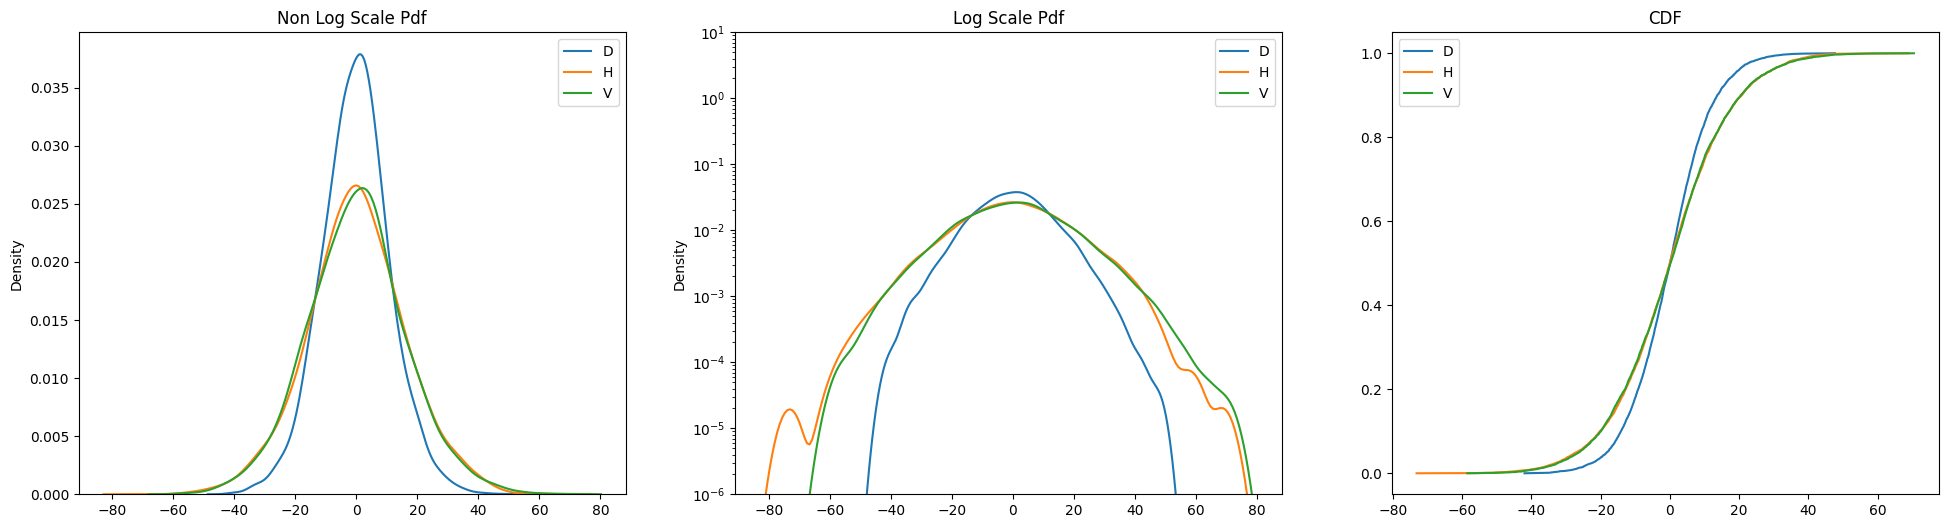

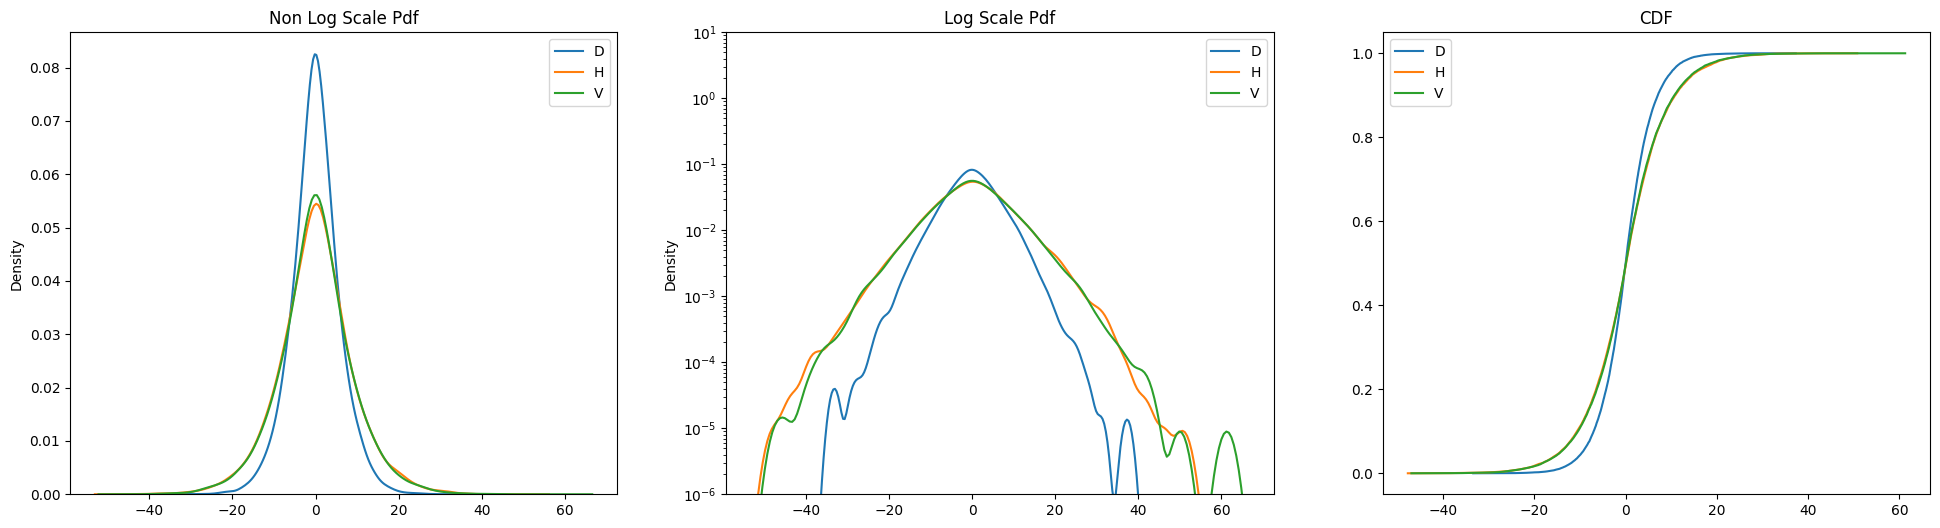

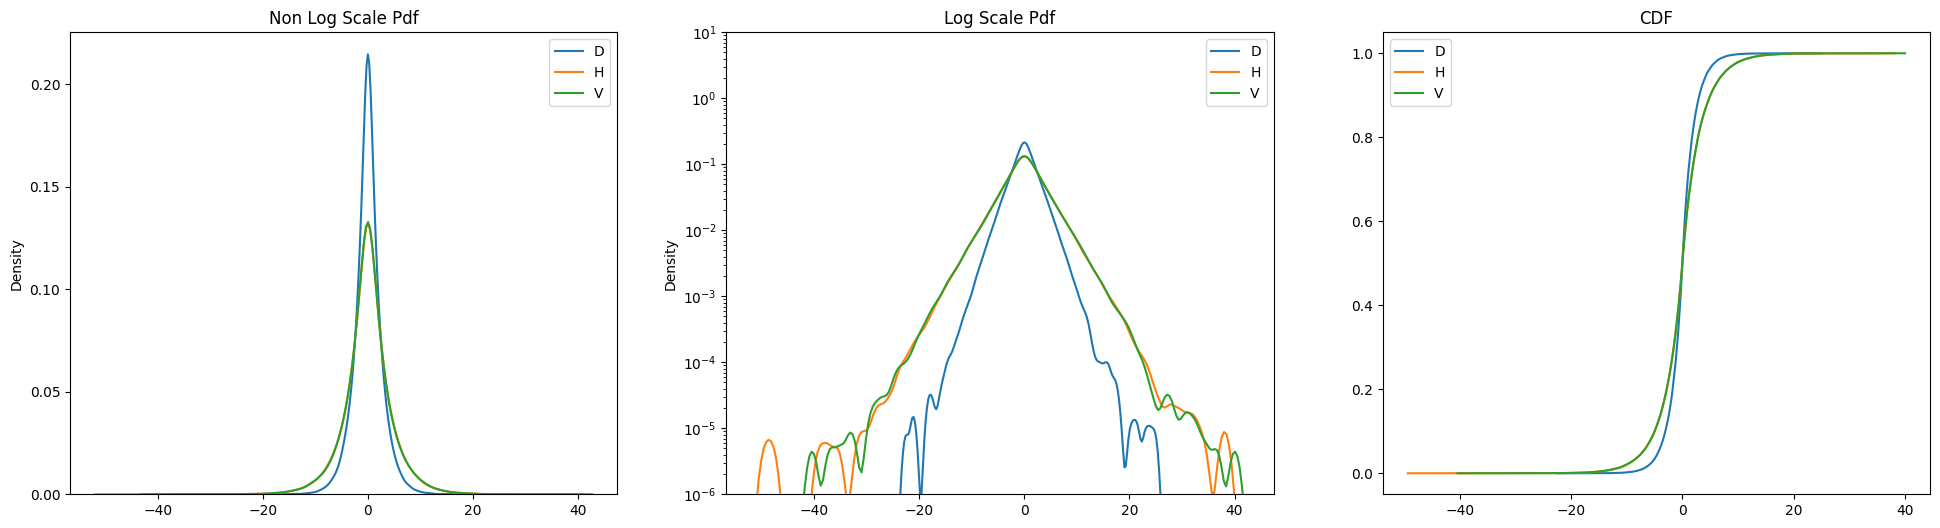

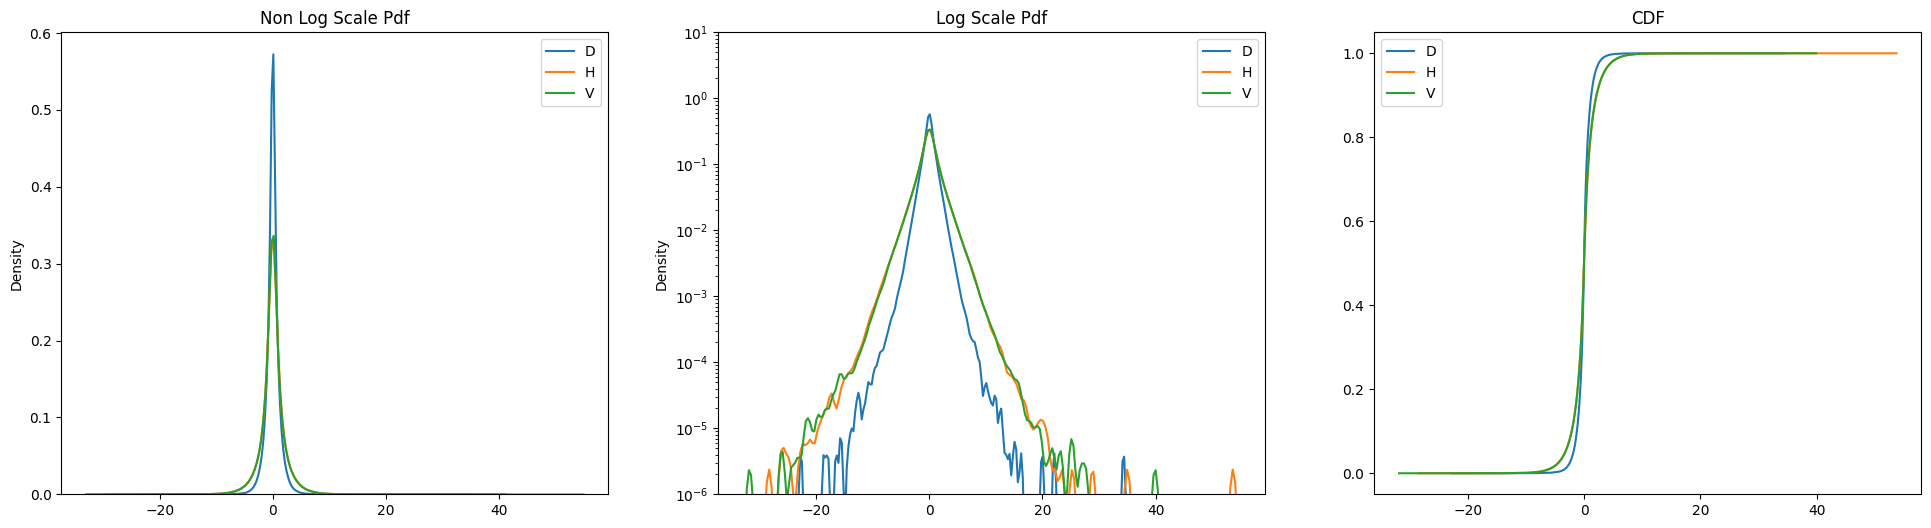

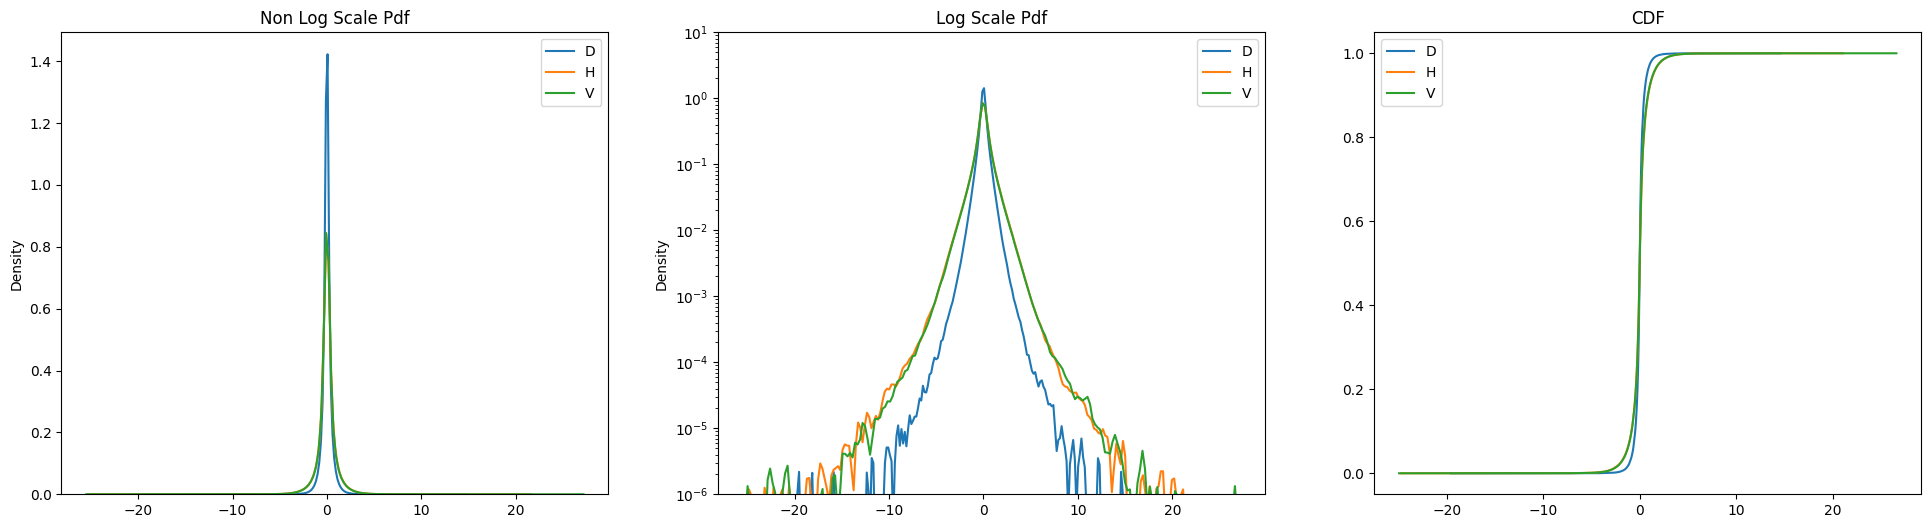

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


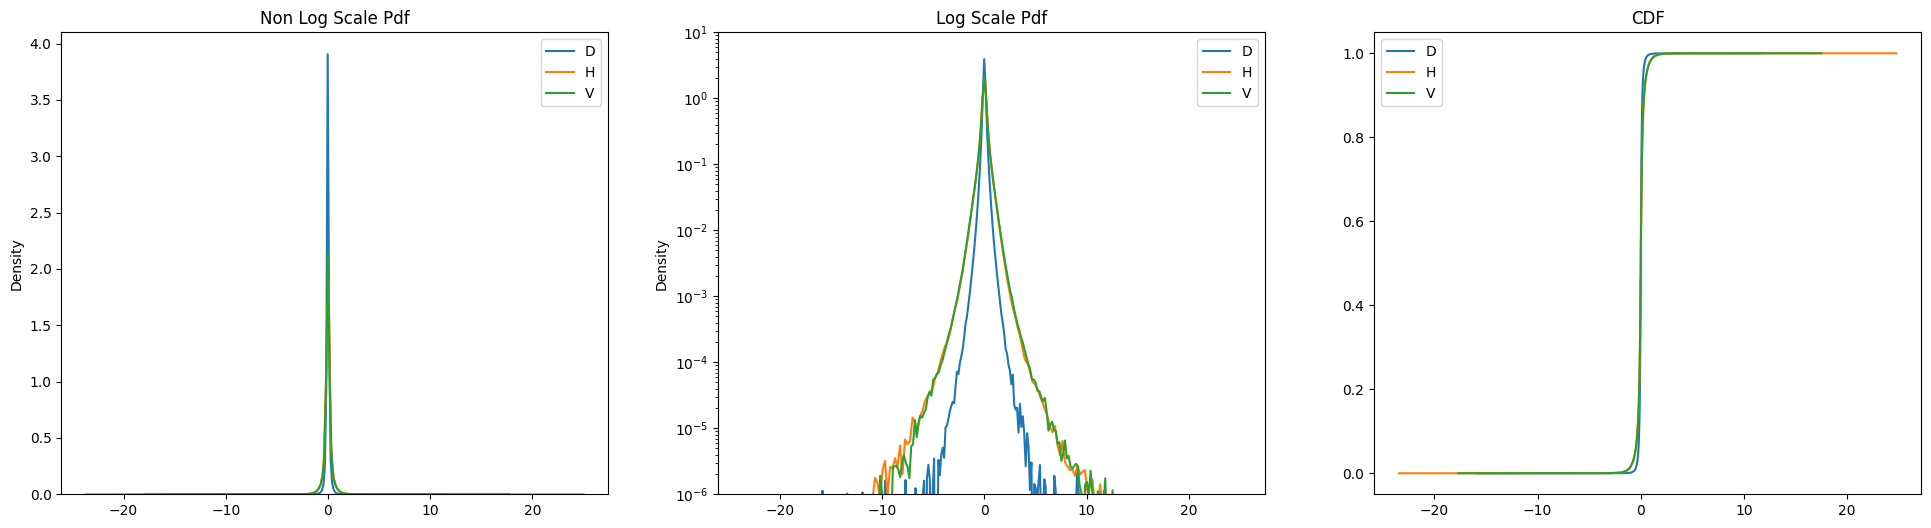

In [28]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)


/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


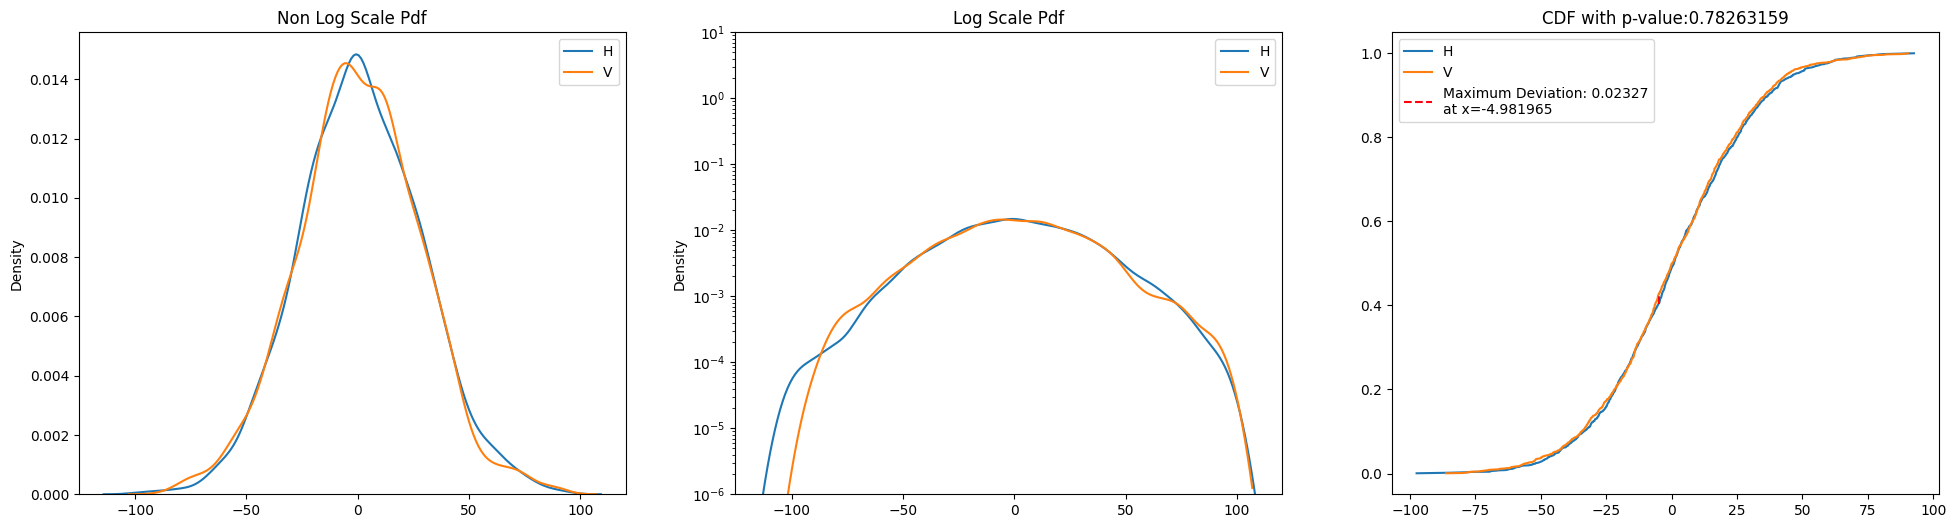

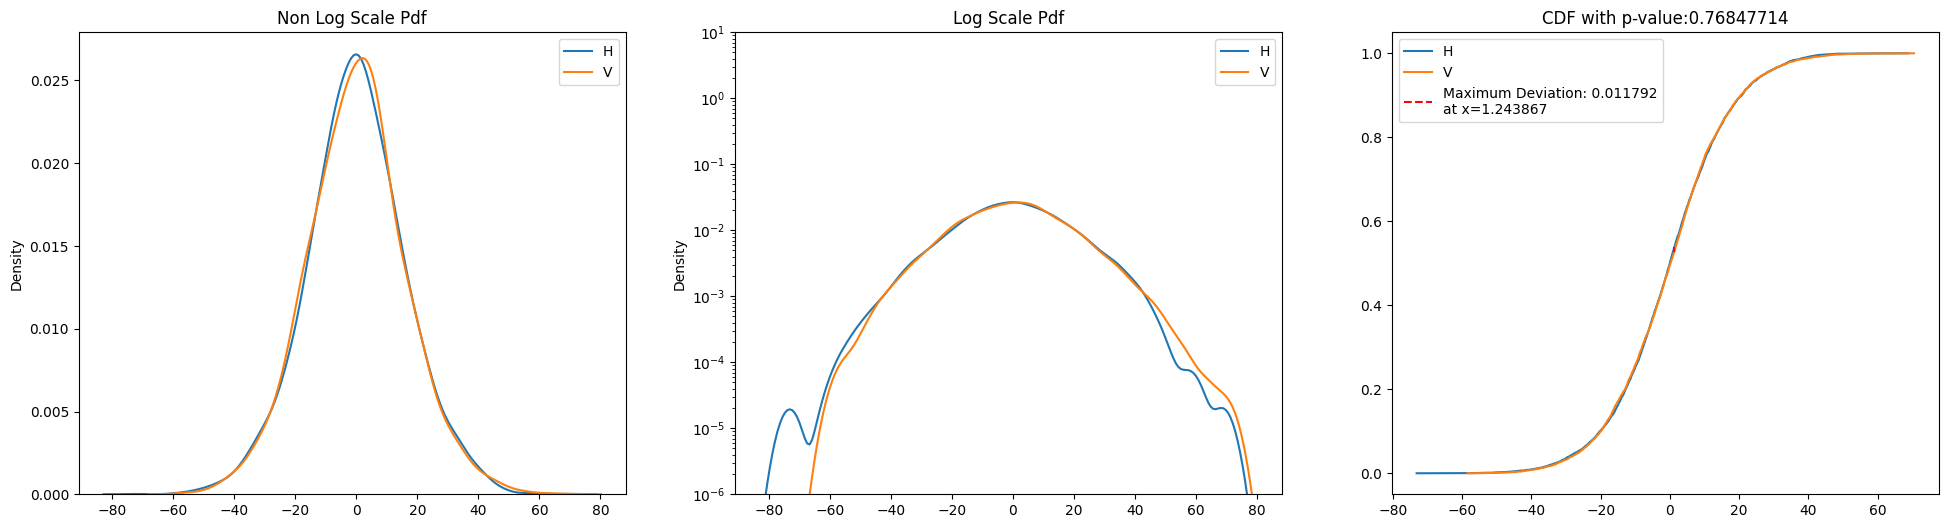

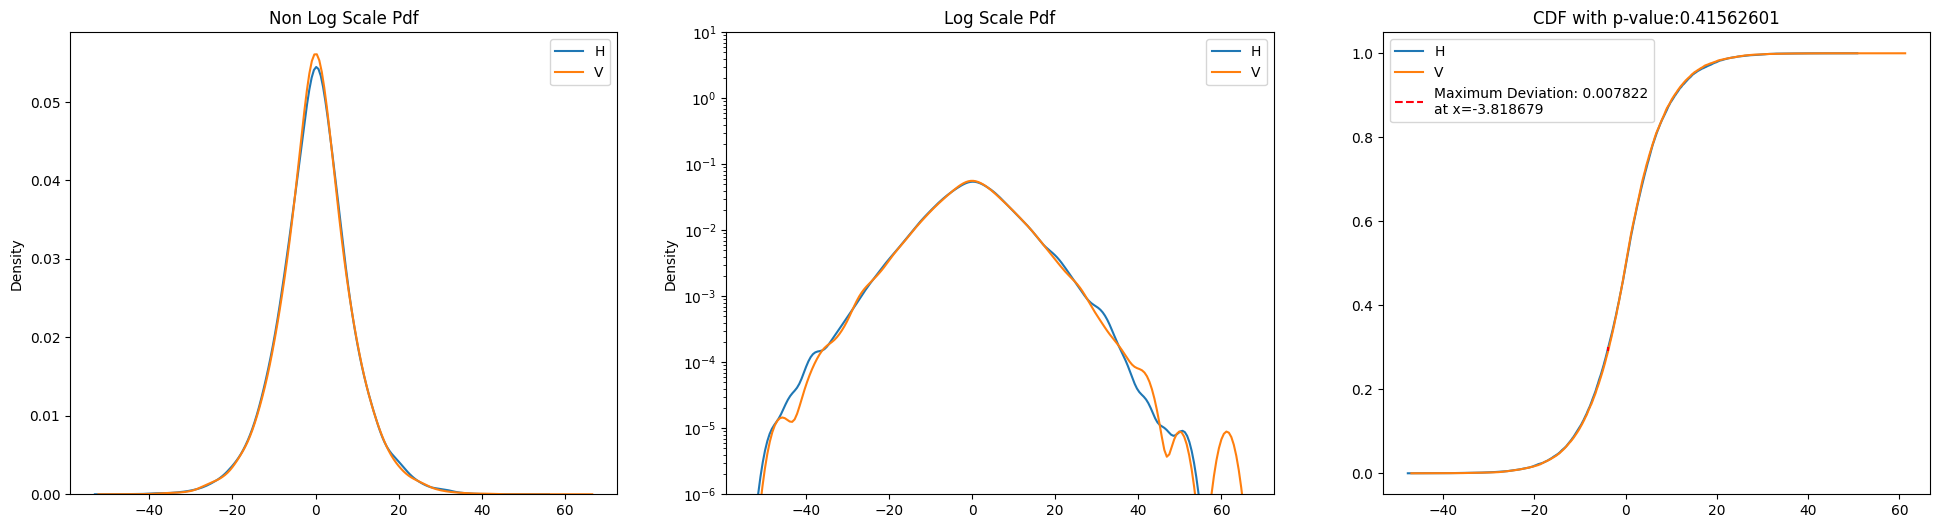

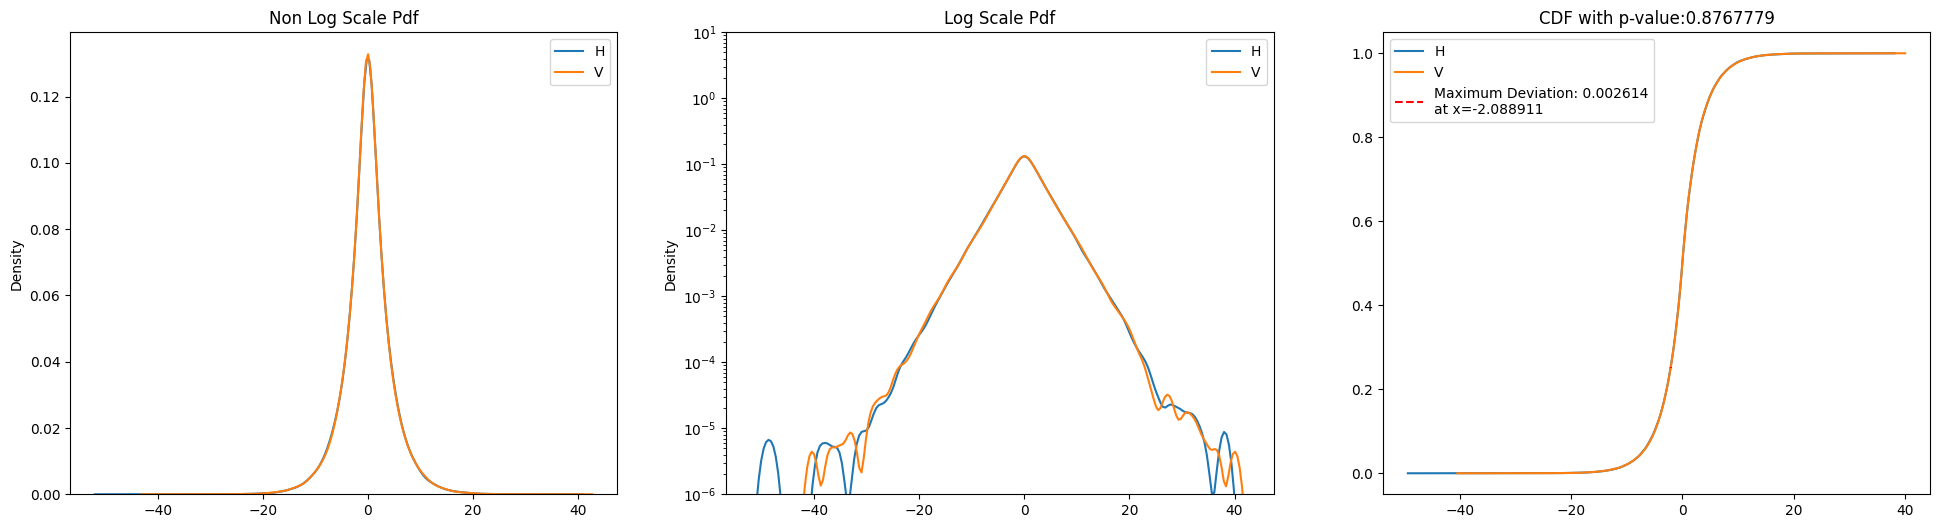

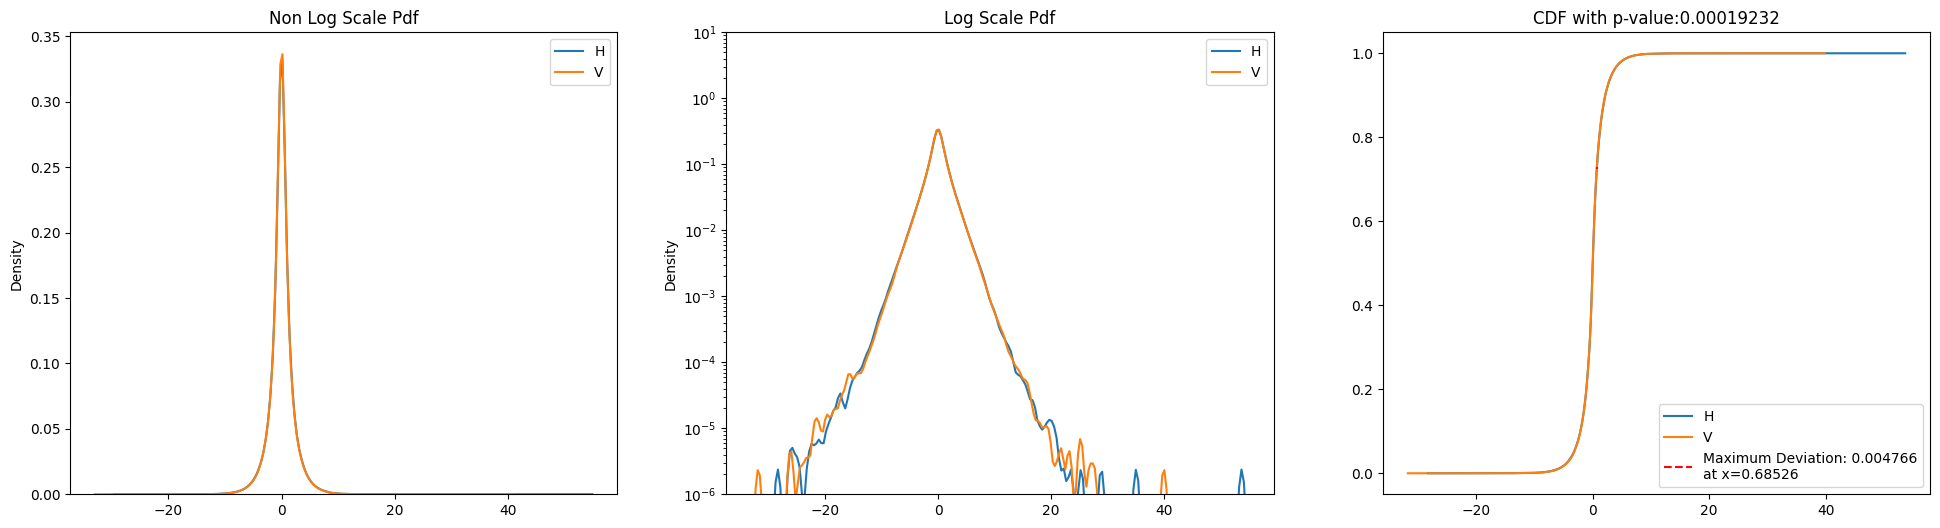

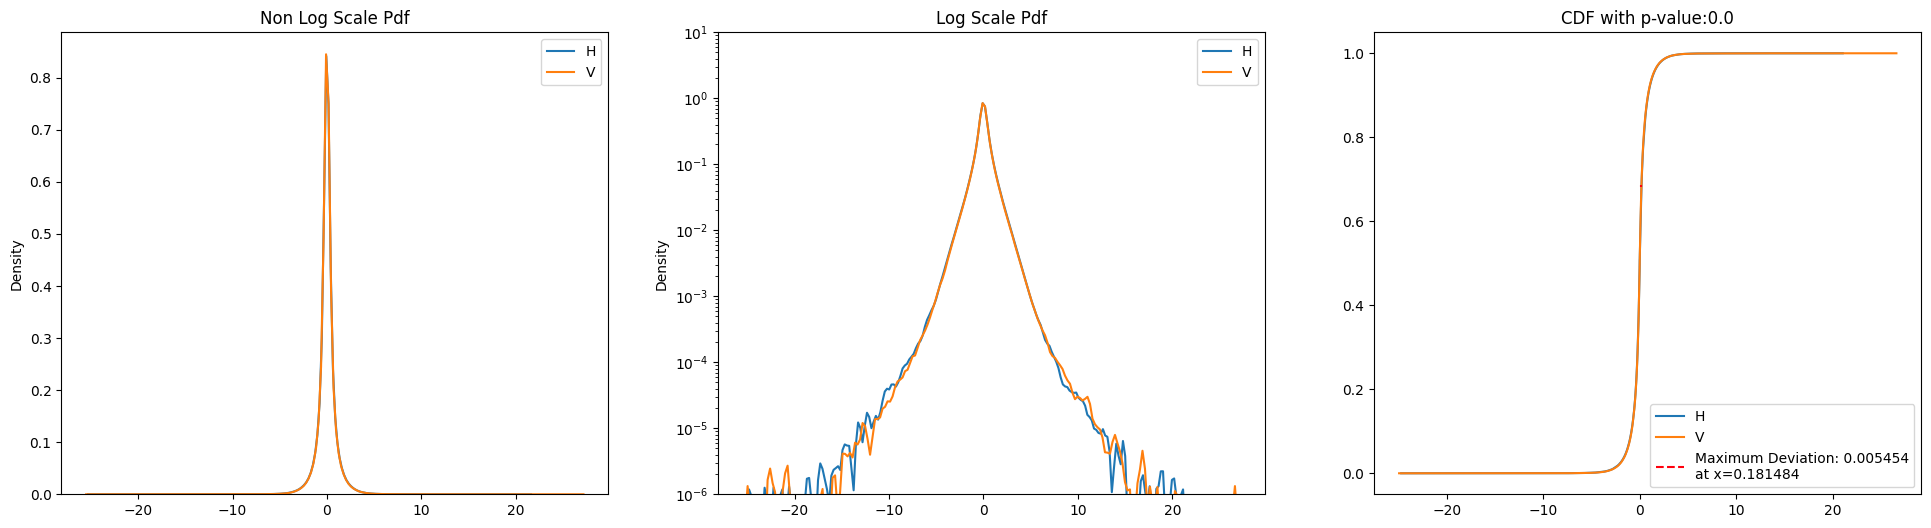

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


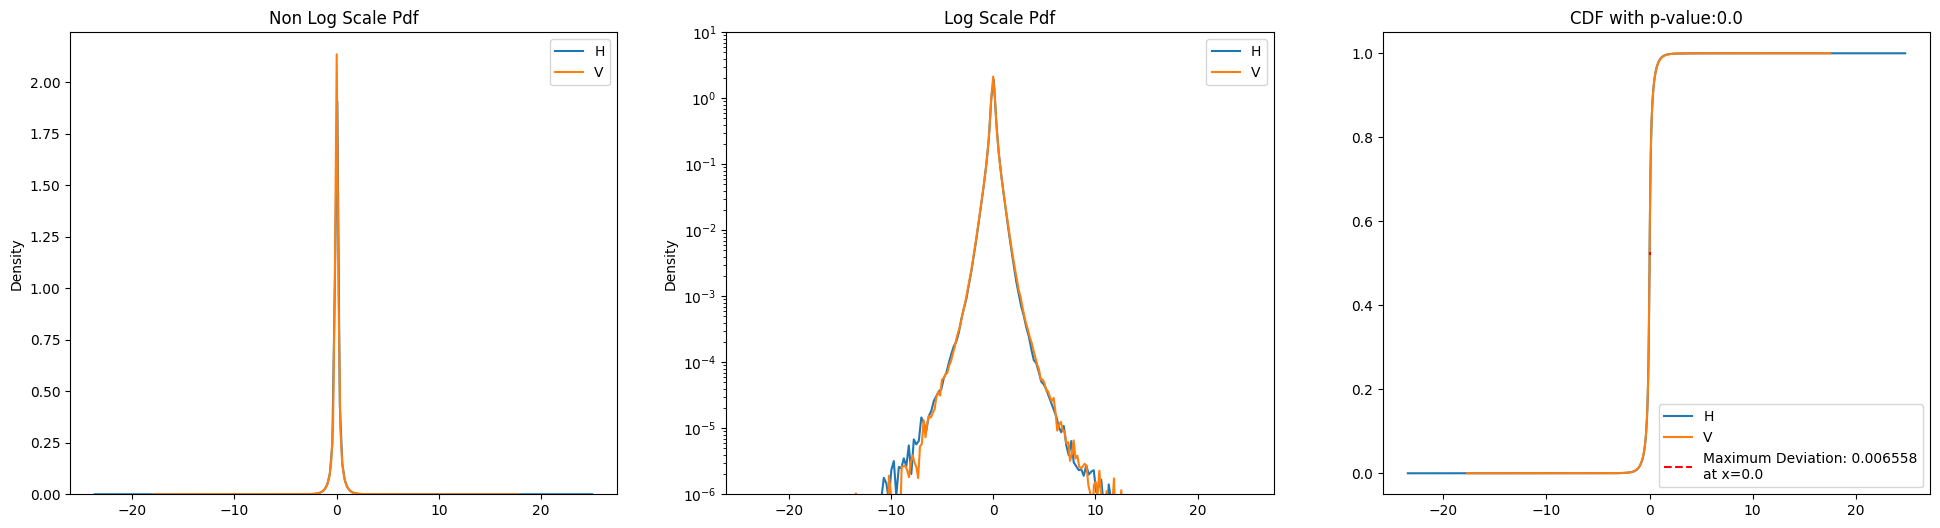

In [29]:
for i in range(2, LAYER_MAX):
    layer_df = blue_wv[blue_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")

# Gray

In [ ]:
gray_wv = convert_to_wavelet_basis(data_dir, "gray", debug=True)
gray_wv.head()

8 layers being used


100%|██████████| 1590/1590 [00:05<00:00, 307.34it/s]


channel  layer orientation  \
0    gray      1          L1   
1    gray      2           D   
2    gray      2           H   
3    gray      2           V   
4    gray      3           D   

                                                data  
0  [-5.329070518200751e-15, -3.552713678800501e-1...  
1  [34.3161194559995, -0.9562662414870378, 7.5601...  
2  [67.08782566471602, -7.035134741827539, -35.71...  
3  [27.245270427843863, -7.383832417162677, 26.68...  
4  [9.005391410752578, -3.7333876746498946, -7.42...

In [31]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_6124/1887393883.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gray_df = pd.concat([gray_df, ks_df], axis = 0)


Layer First Second   KS_Stat         Pvalue
2     2     H      V  0.027673   5.767170e-01
1     2     D      V  0.091824   2.967435e-06
0     2     D      H  0.106918   2.481059e-08
2     3     H      V  0.011792   7.684771e-01
1     3     D      V  0.088994   2.501411e-22
0     3     D      H  0.093711   1.026334e-24
2     4     H      V  0.008648   2.957029e-01
1     4     D      V  0.086439   3.887484e-83
0     4     D      H  0.088719   1.451764e-87
2     5     H      V  0.003007   7.457992e-01
1     5     D      V  0.088728   0.000000e+00
0     5     D      H  0.090448   0.000000e+00
2     6     H      V  0.005368   1.605286e-05
1     6     D      V  0.085191   0.000000e+00
0     6     D      H  0.088898   0.000000e+00
2     7     H      V  0.006017   5.038968e-26
1     7     D      V  0.084986   0.000000e+00
0     7     D      H  0.090414   0.000000e+00
2     8     H      V  0.006740  6.322881e-129
0     8     D      H  0.114618   0.000000e+00
1     8     D      V  0.114618   0.000000e+00

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


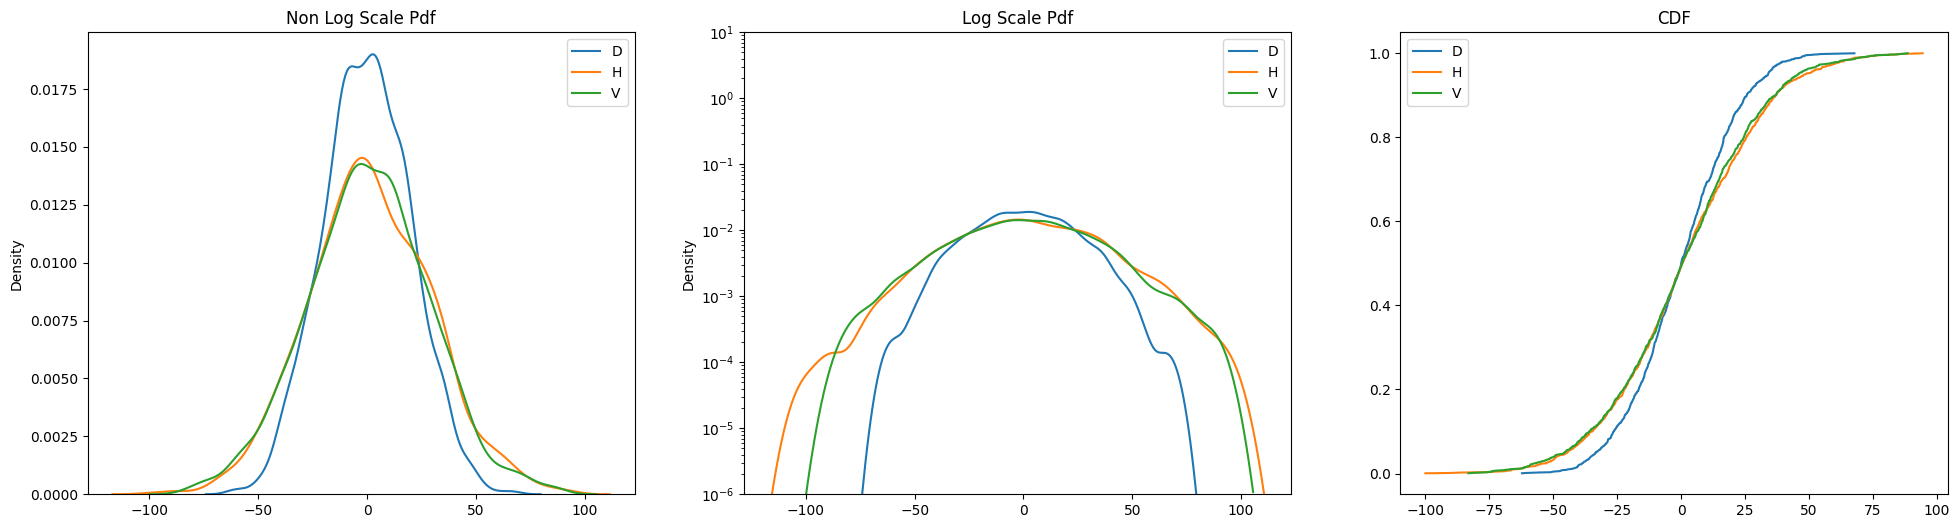

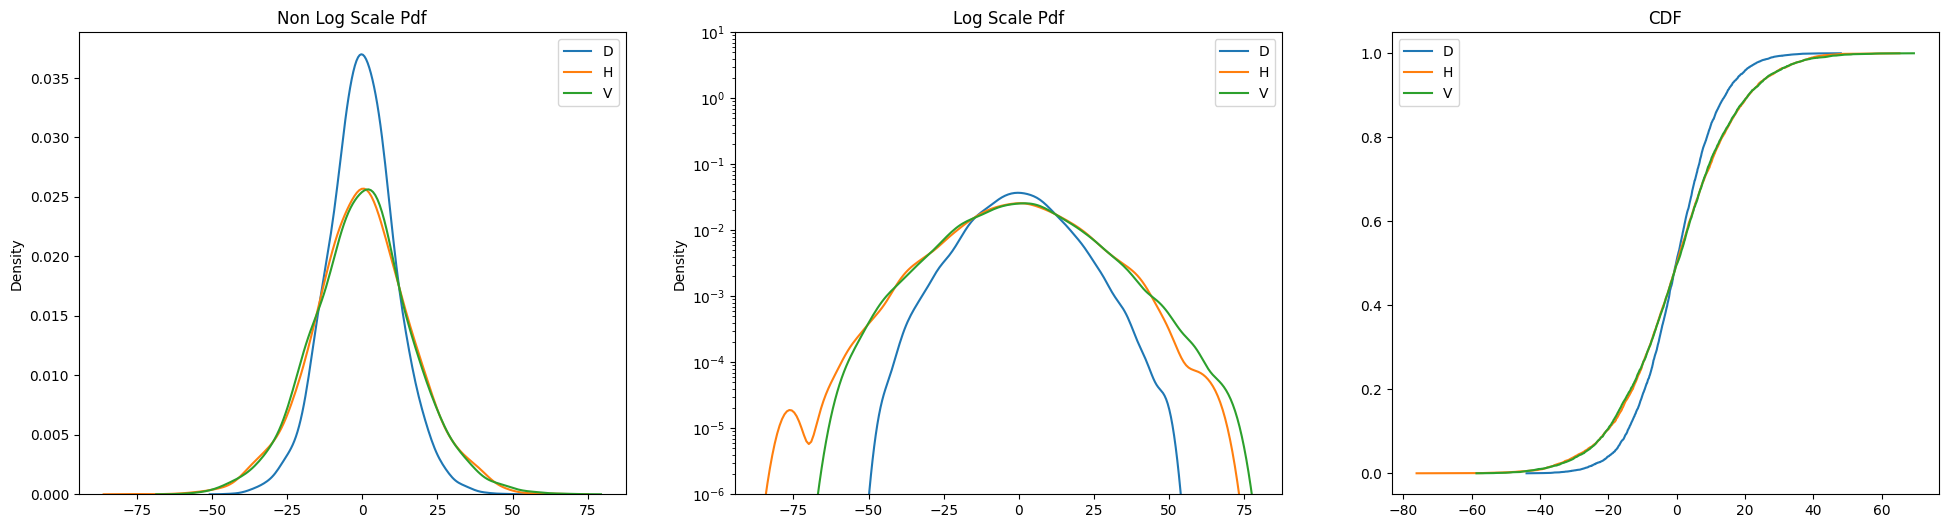

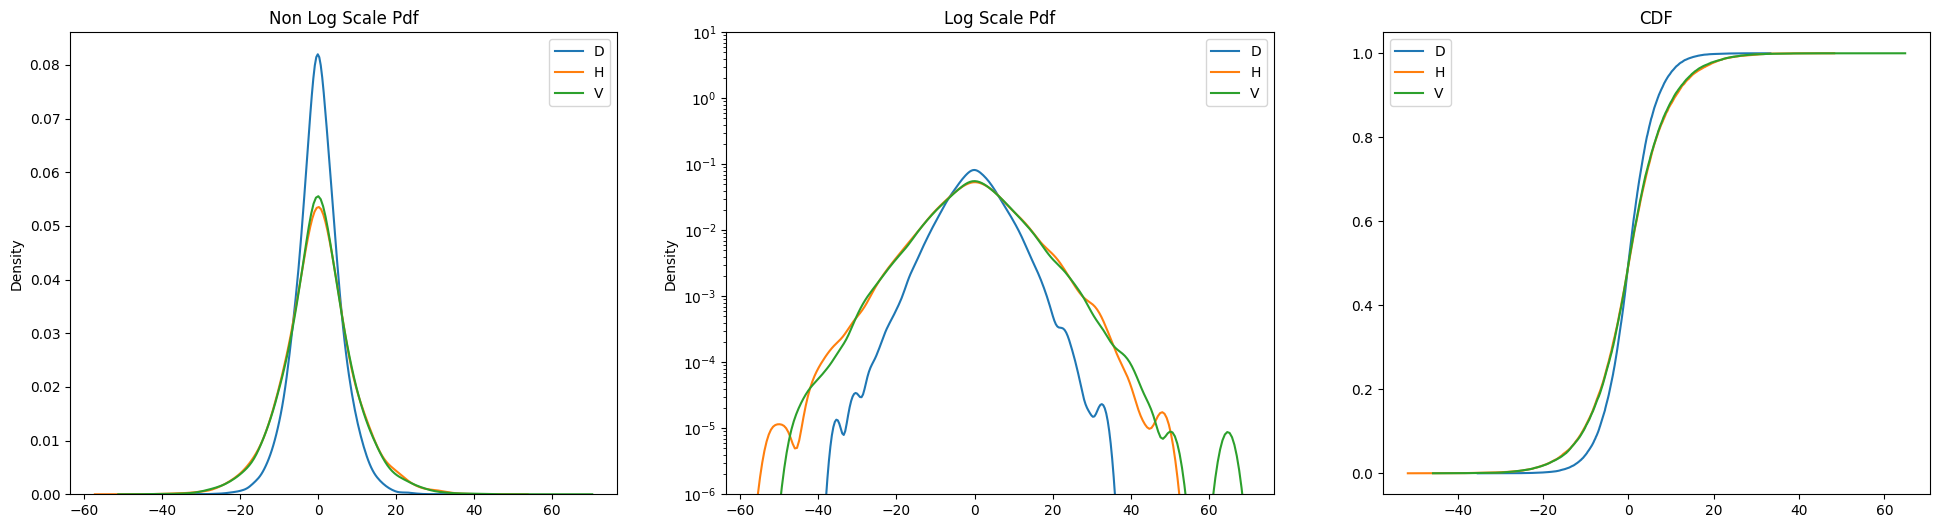

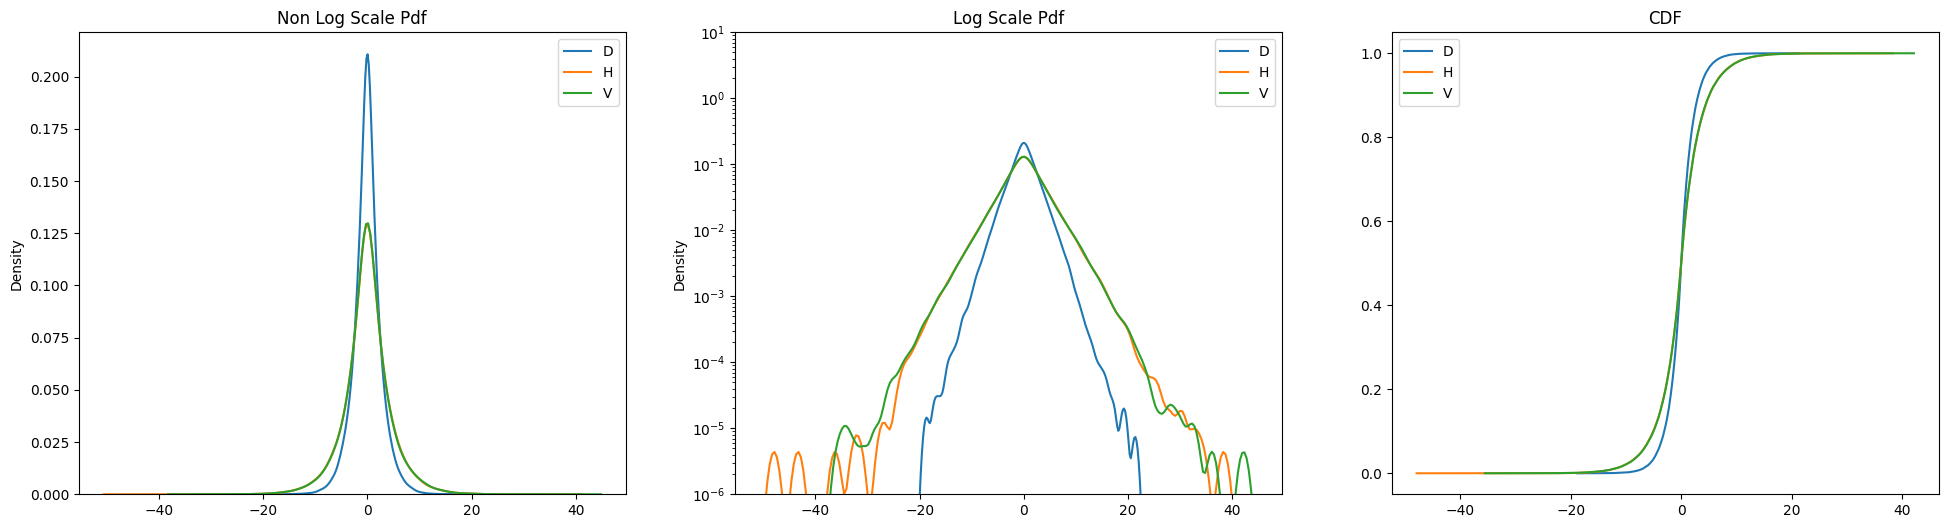

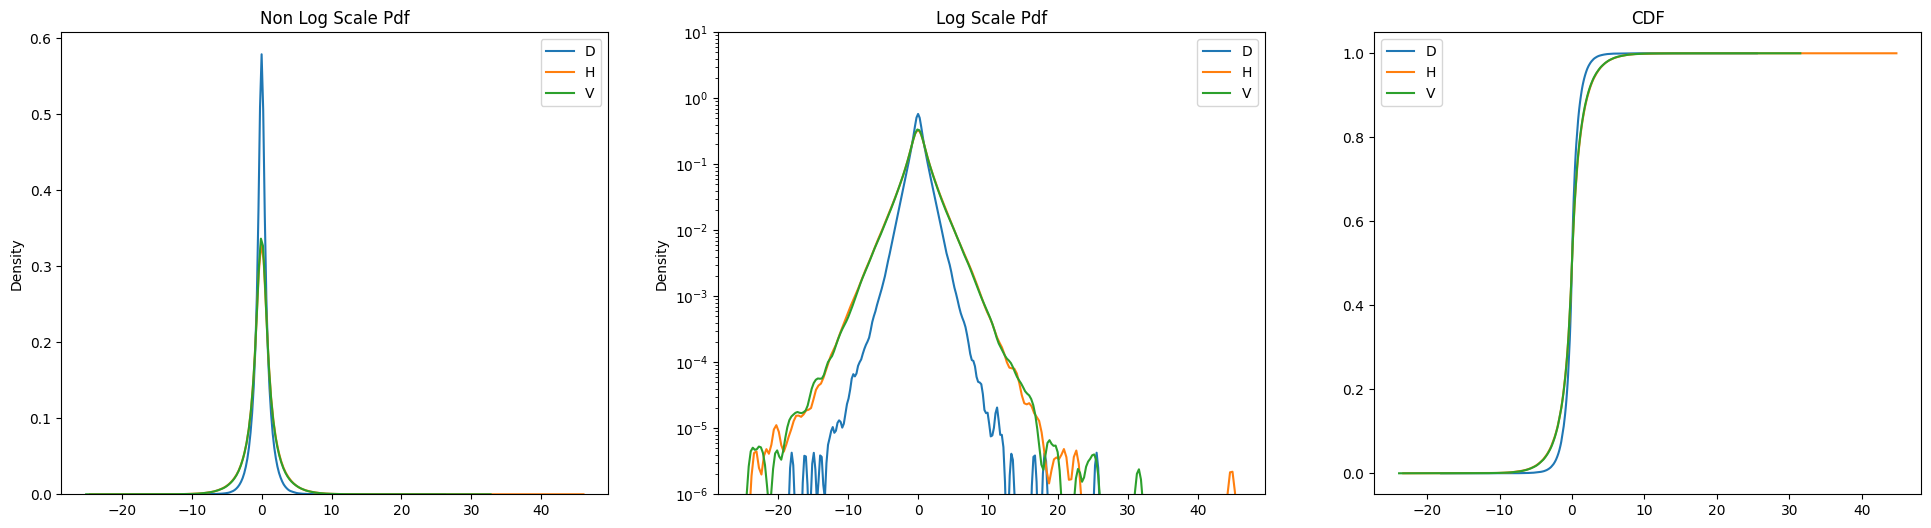

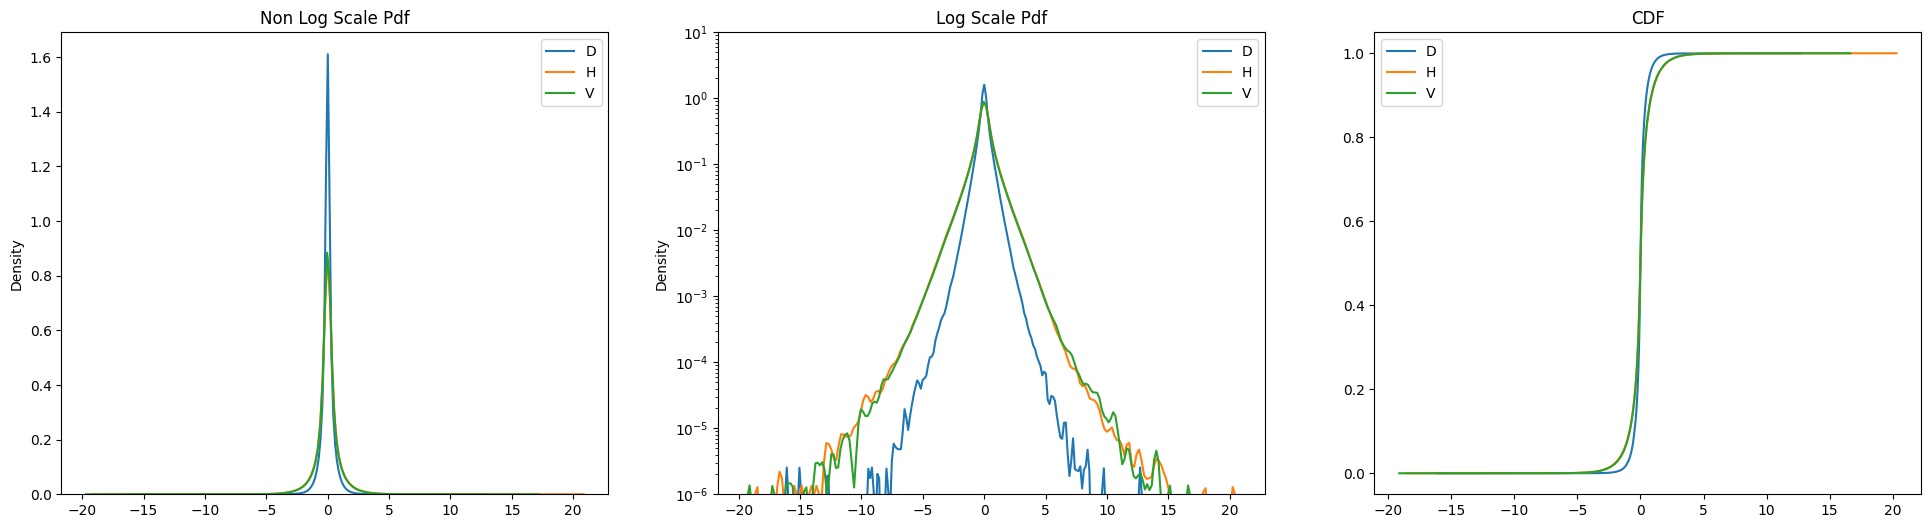

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


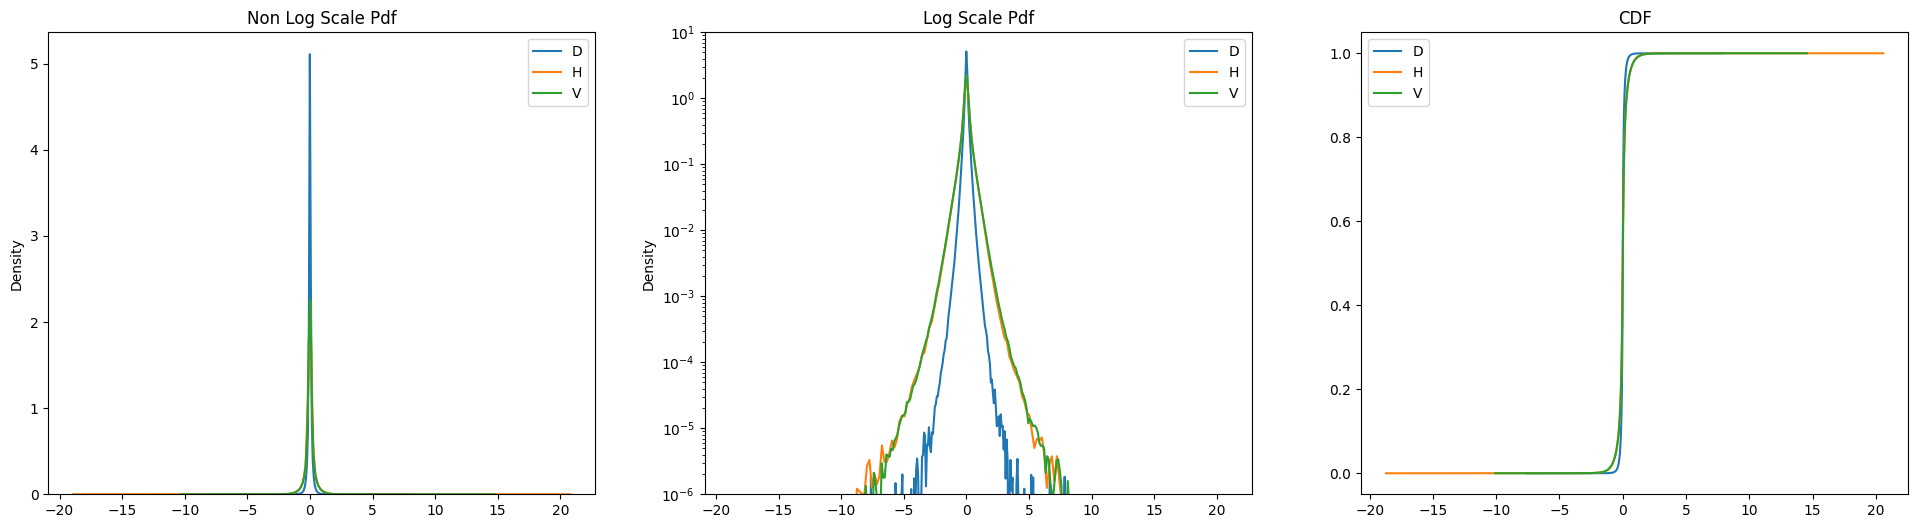

In [32]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


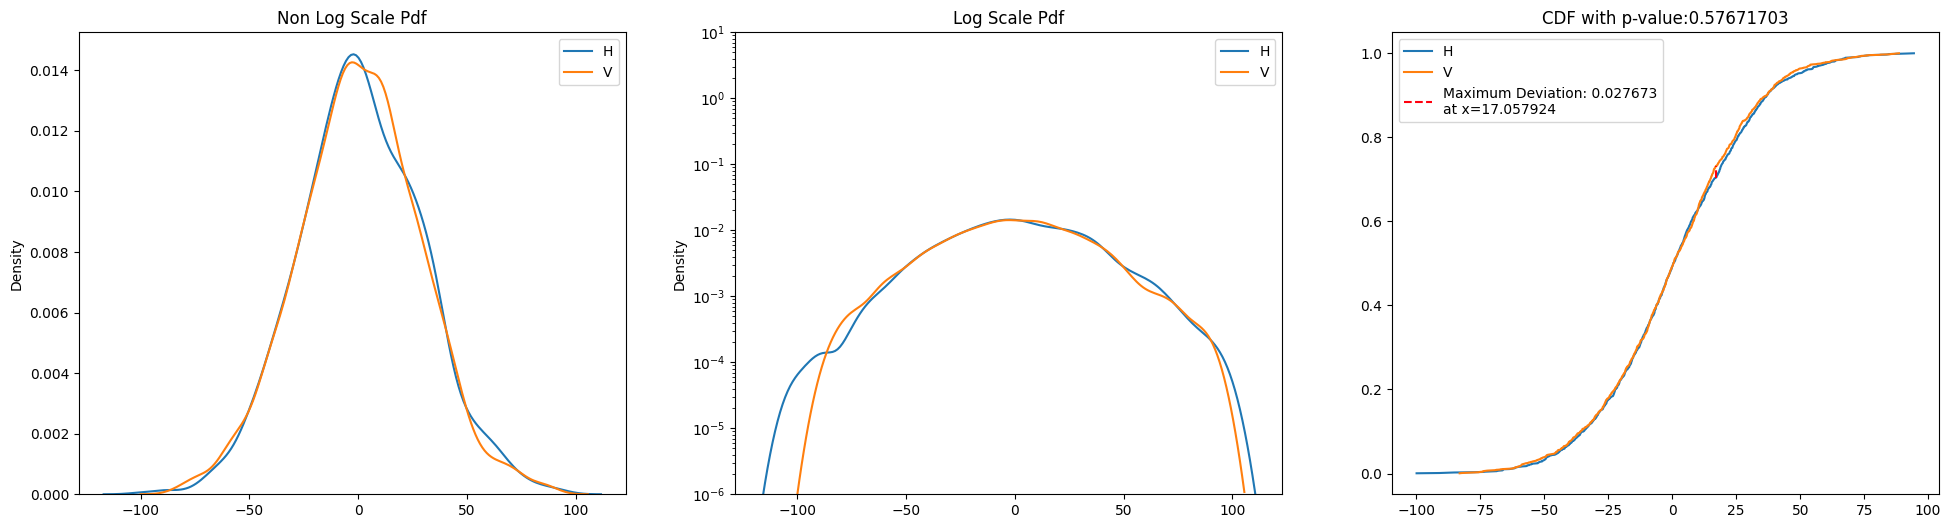

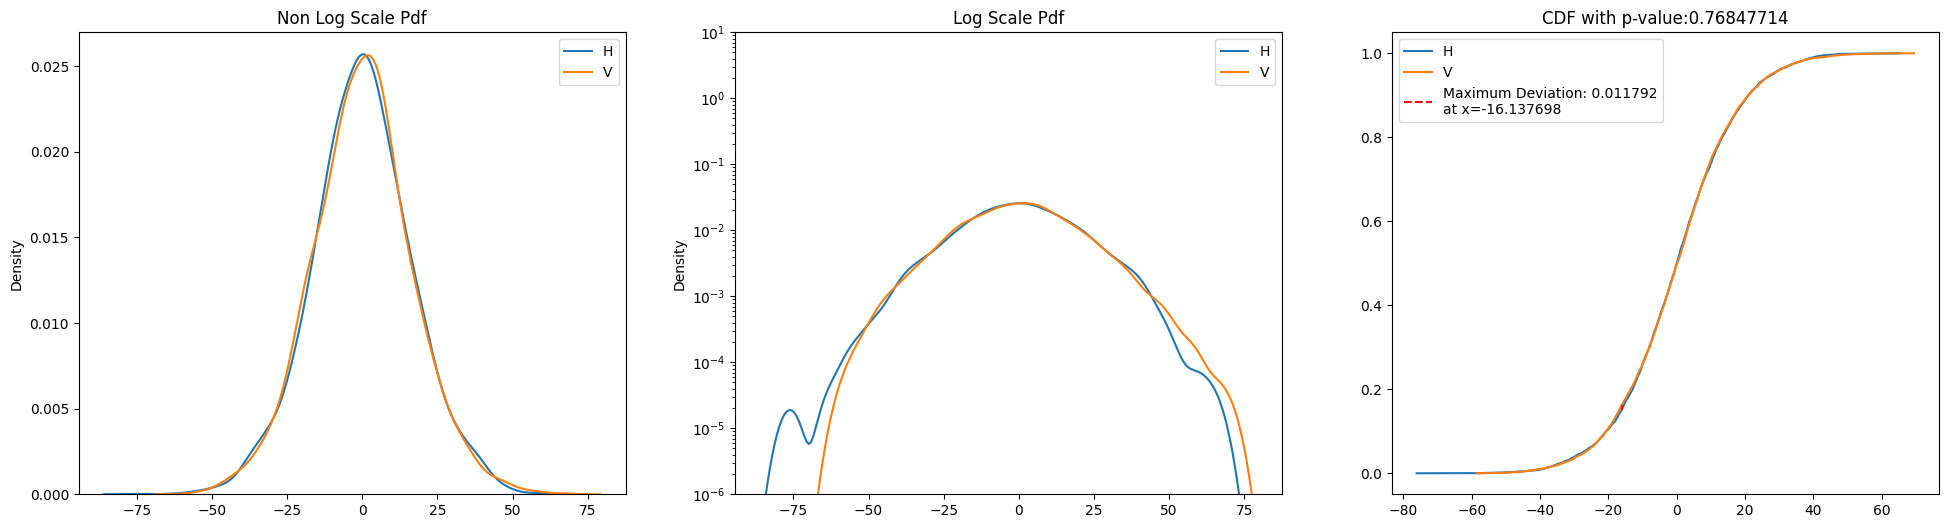

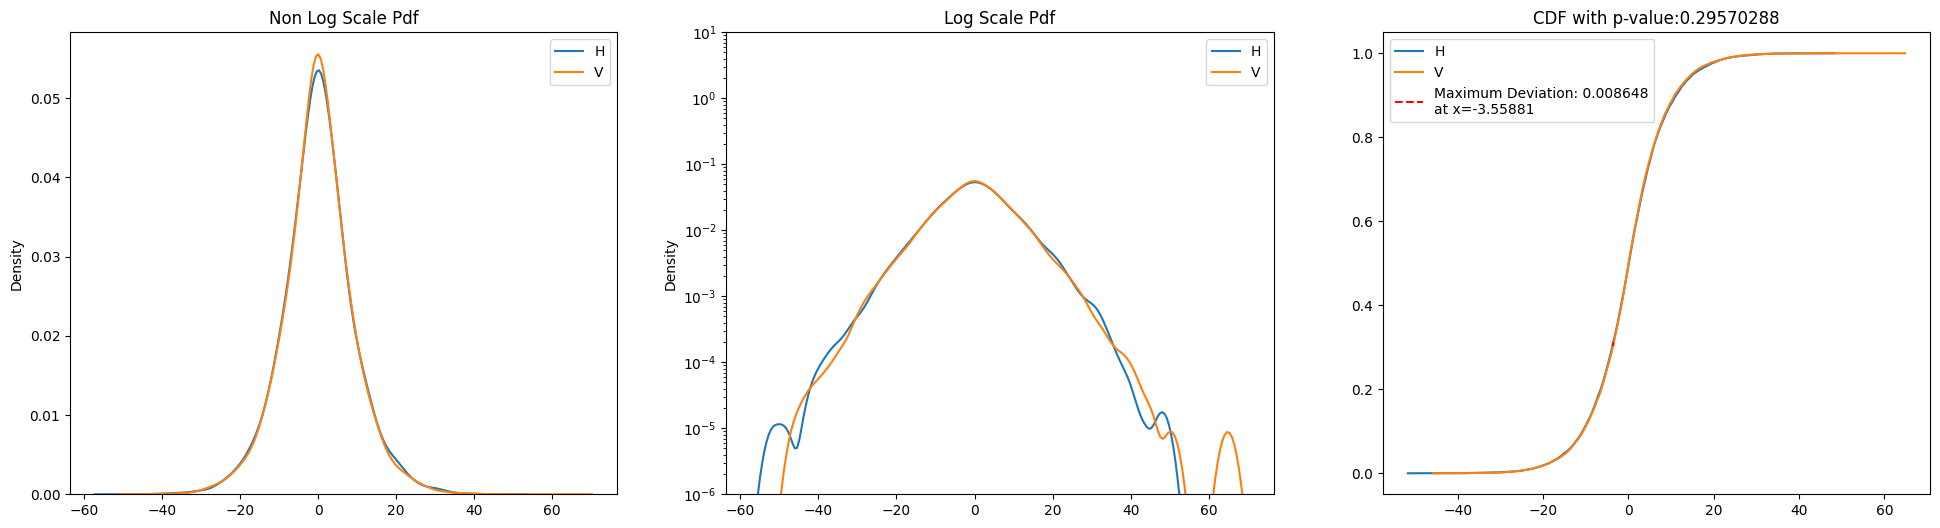

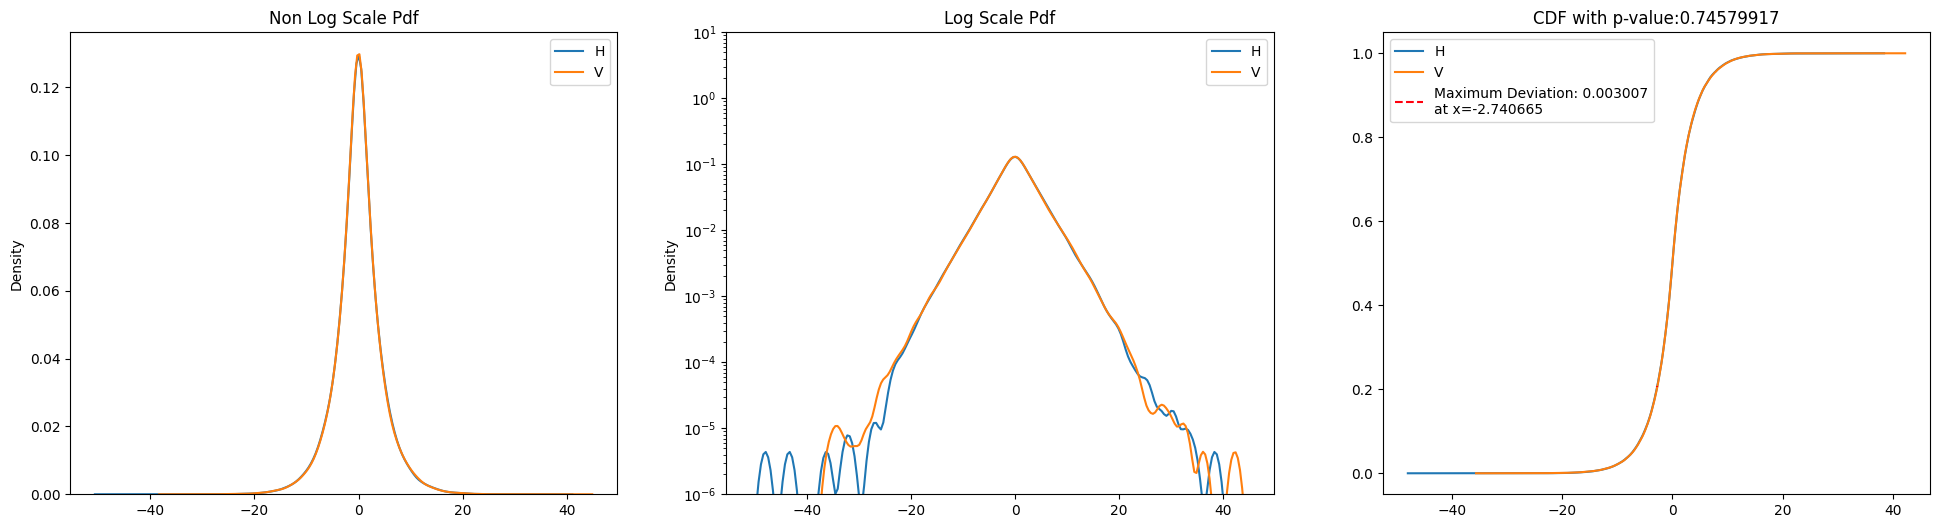

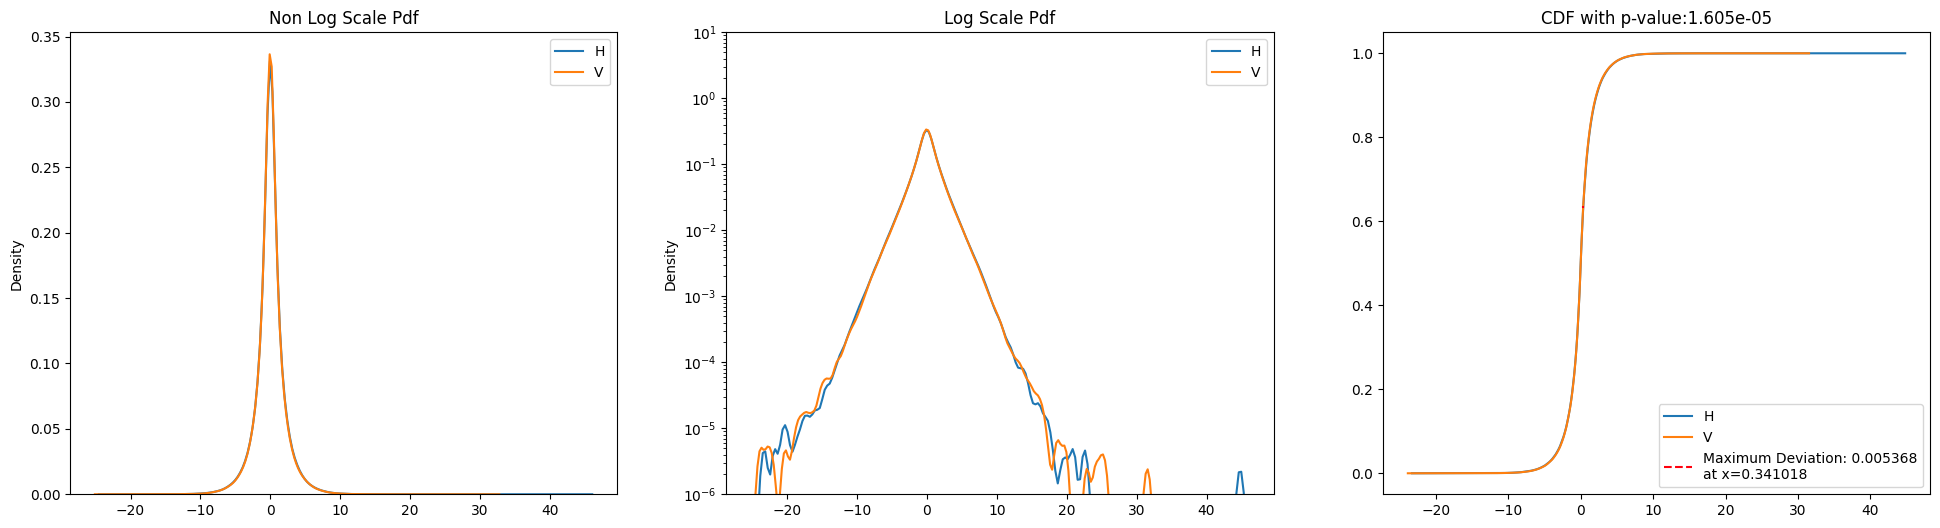

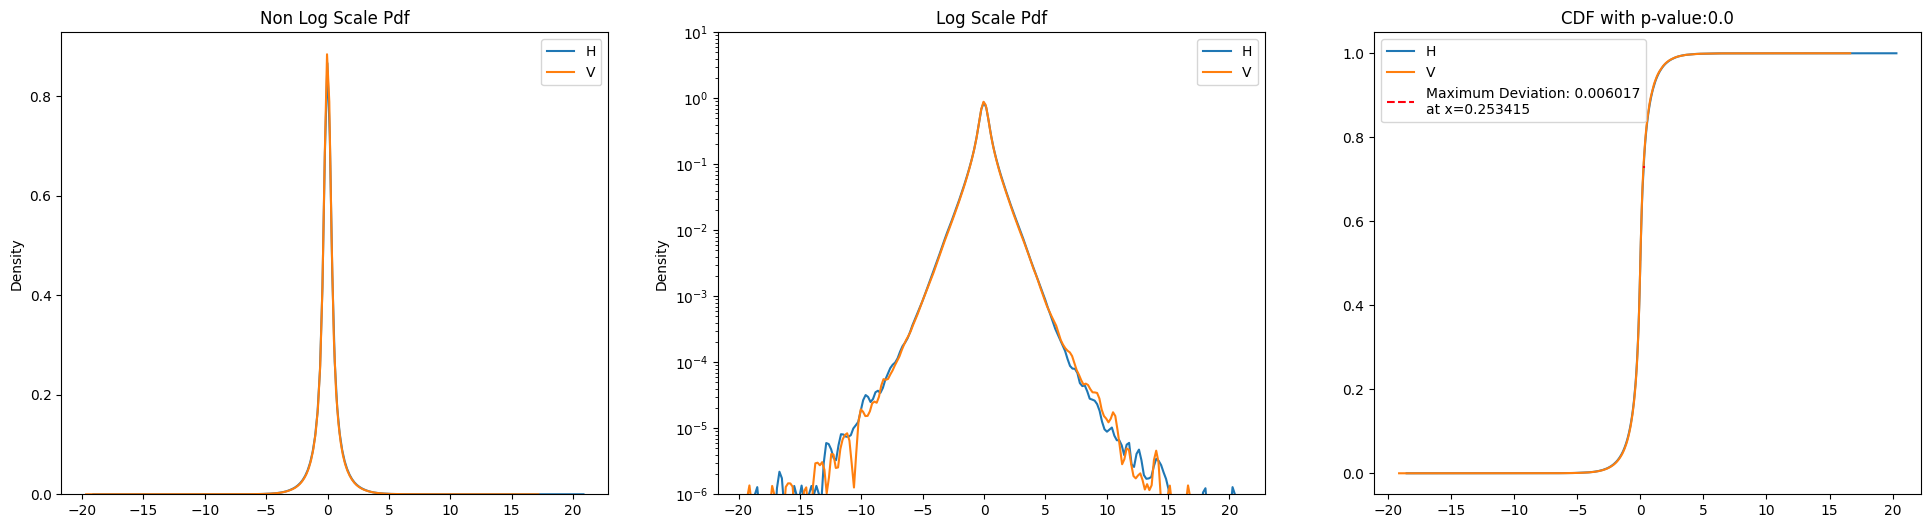

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


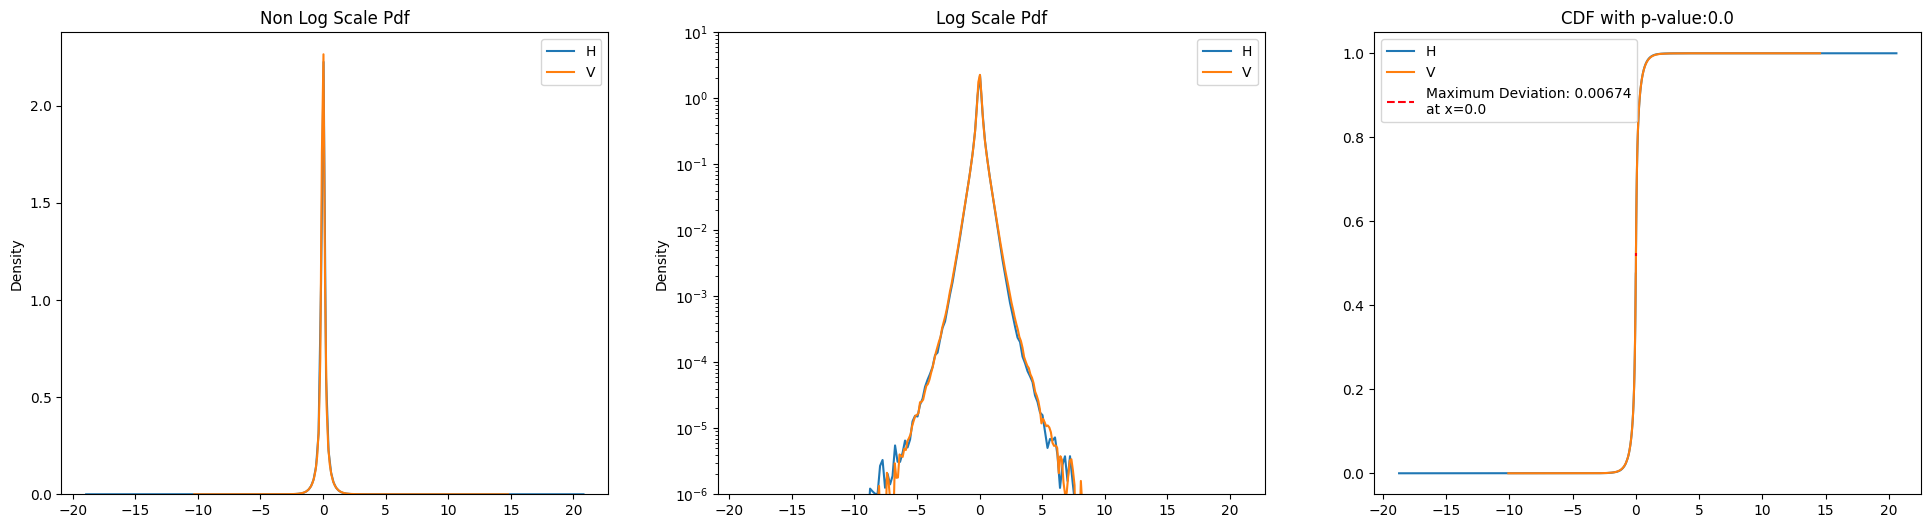

In [33]:
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")